In [1]:
# Assignment 5
# Relationship between solar radio flux F10.7 and sunspot number
# Team 2:
#     Ekaterina Karmanova
#     Timur Chikichev
#     Yaroslav Okunev
#     Nikita Mikhailovskiy
#
# Skoltech, 08.10.2019

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

In [3]:
#Constants
#Size of trajectory
c = 200
#Initial conditions
x1 = 5
v1 = 1
t = 1
#Variance of acceleration noise
sa = 0.2
s2a = sa**2

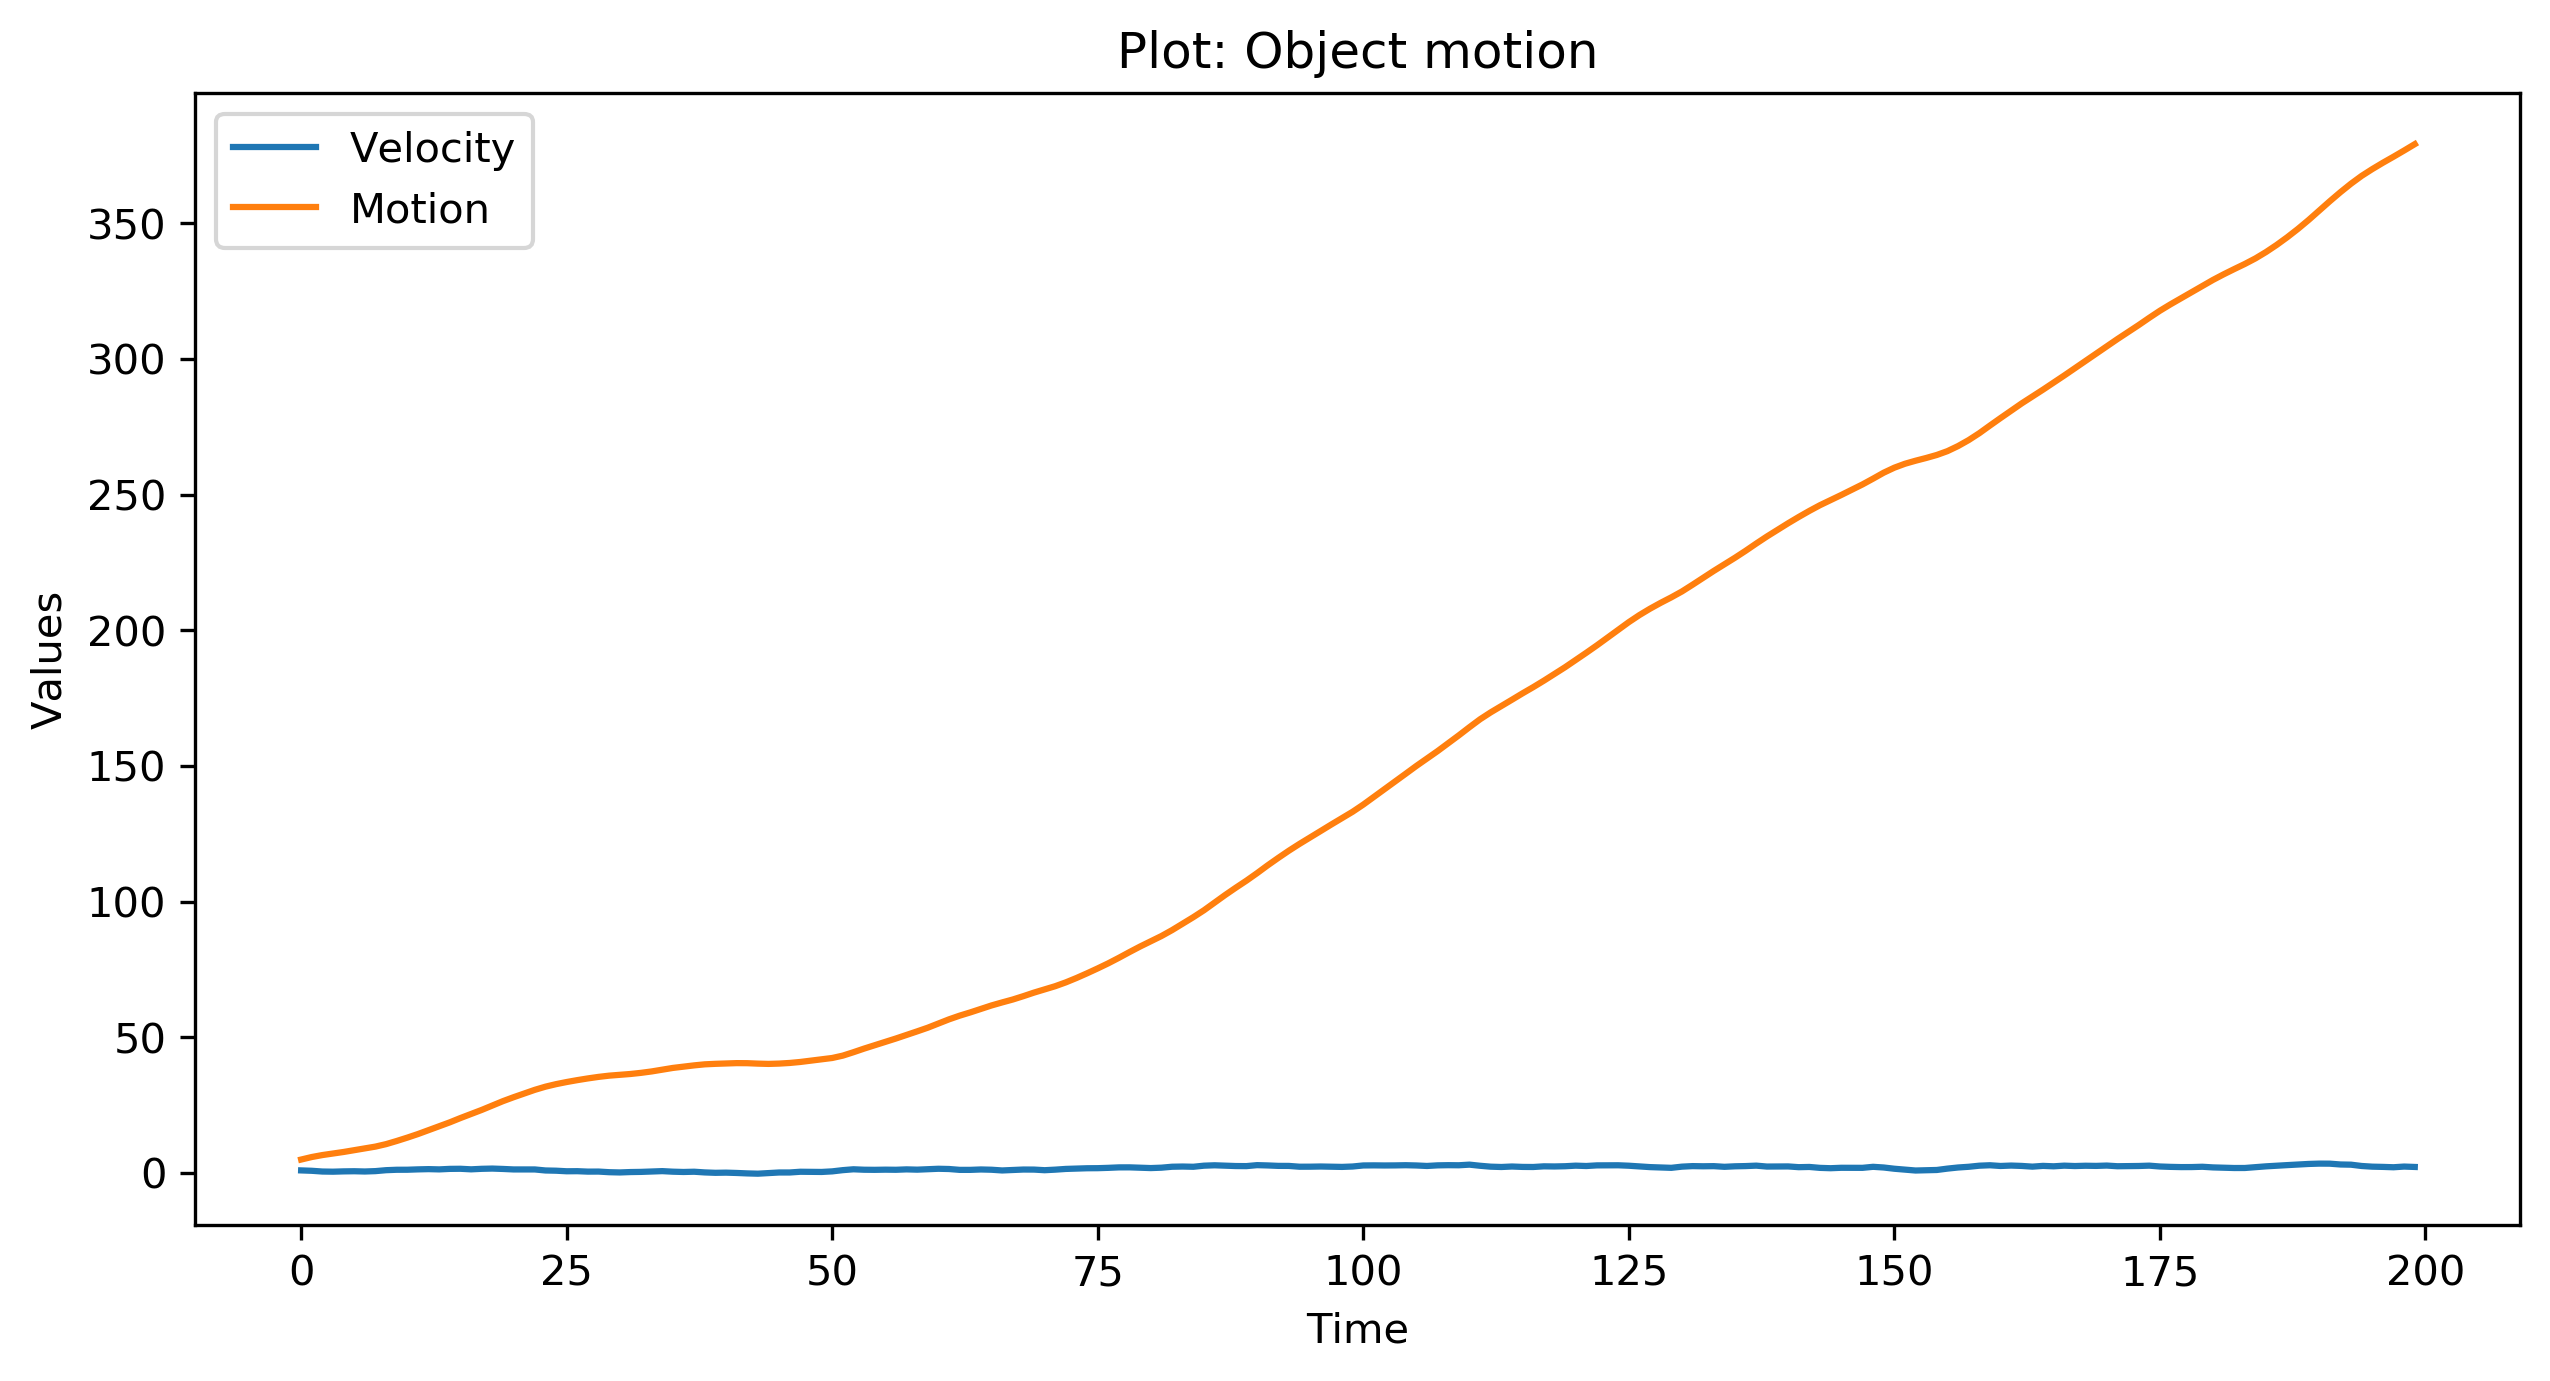

In [4]:
#1 Generating a true trajectory of an object motion
#acceleration
a = np.random.normal(0,sa,c)
#velocity
v = np.zeros(c)
v[0] = v1
for i in range (1,c):
    v[i] = v[i-1] + a[i-1]*t
#motion
x = np.zeros(c)
x[0] = x1
for i in range (1,c):
    x[i] = x[i-1] + v[i-1]*t + a[i-1]*t*t/2

figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Object motion')
plt.plot(v, label='Velocity')
plt.plot(x, label='Motion')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

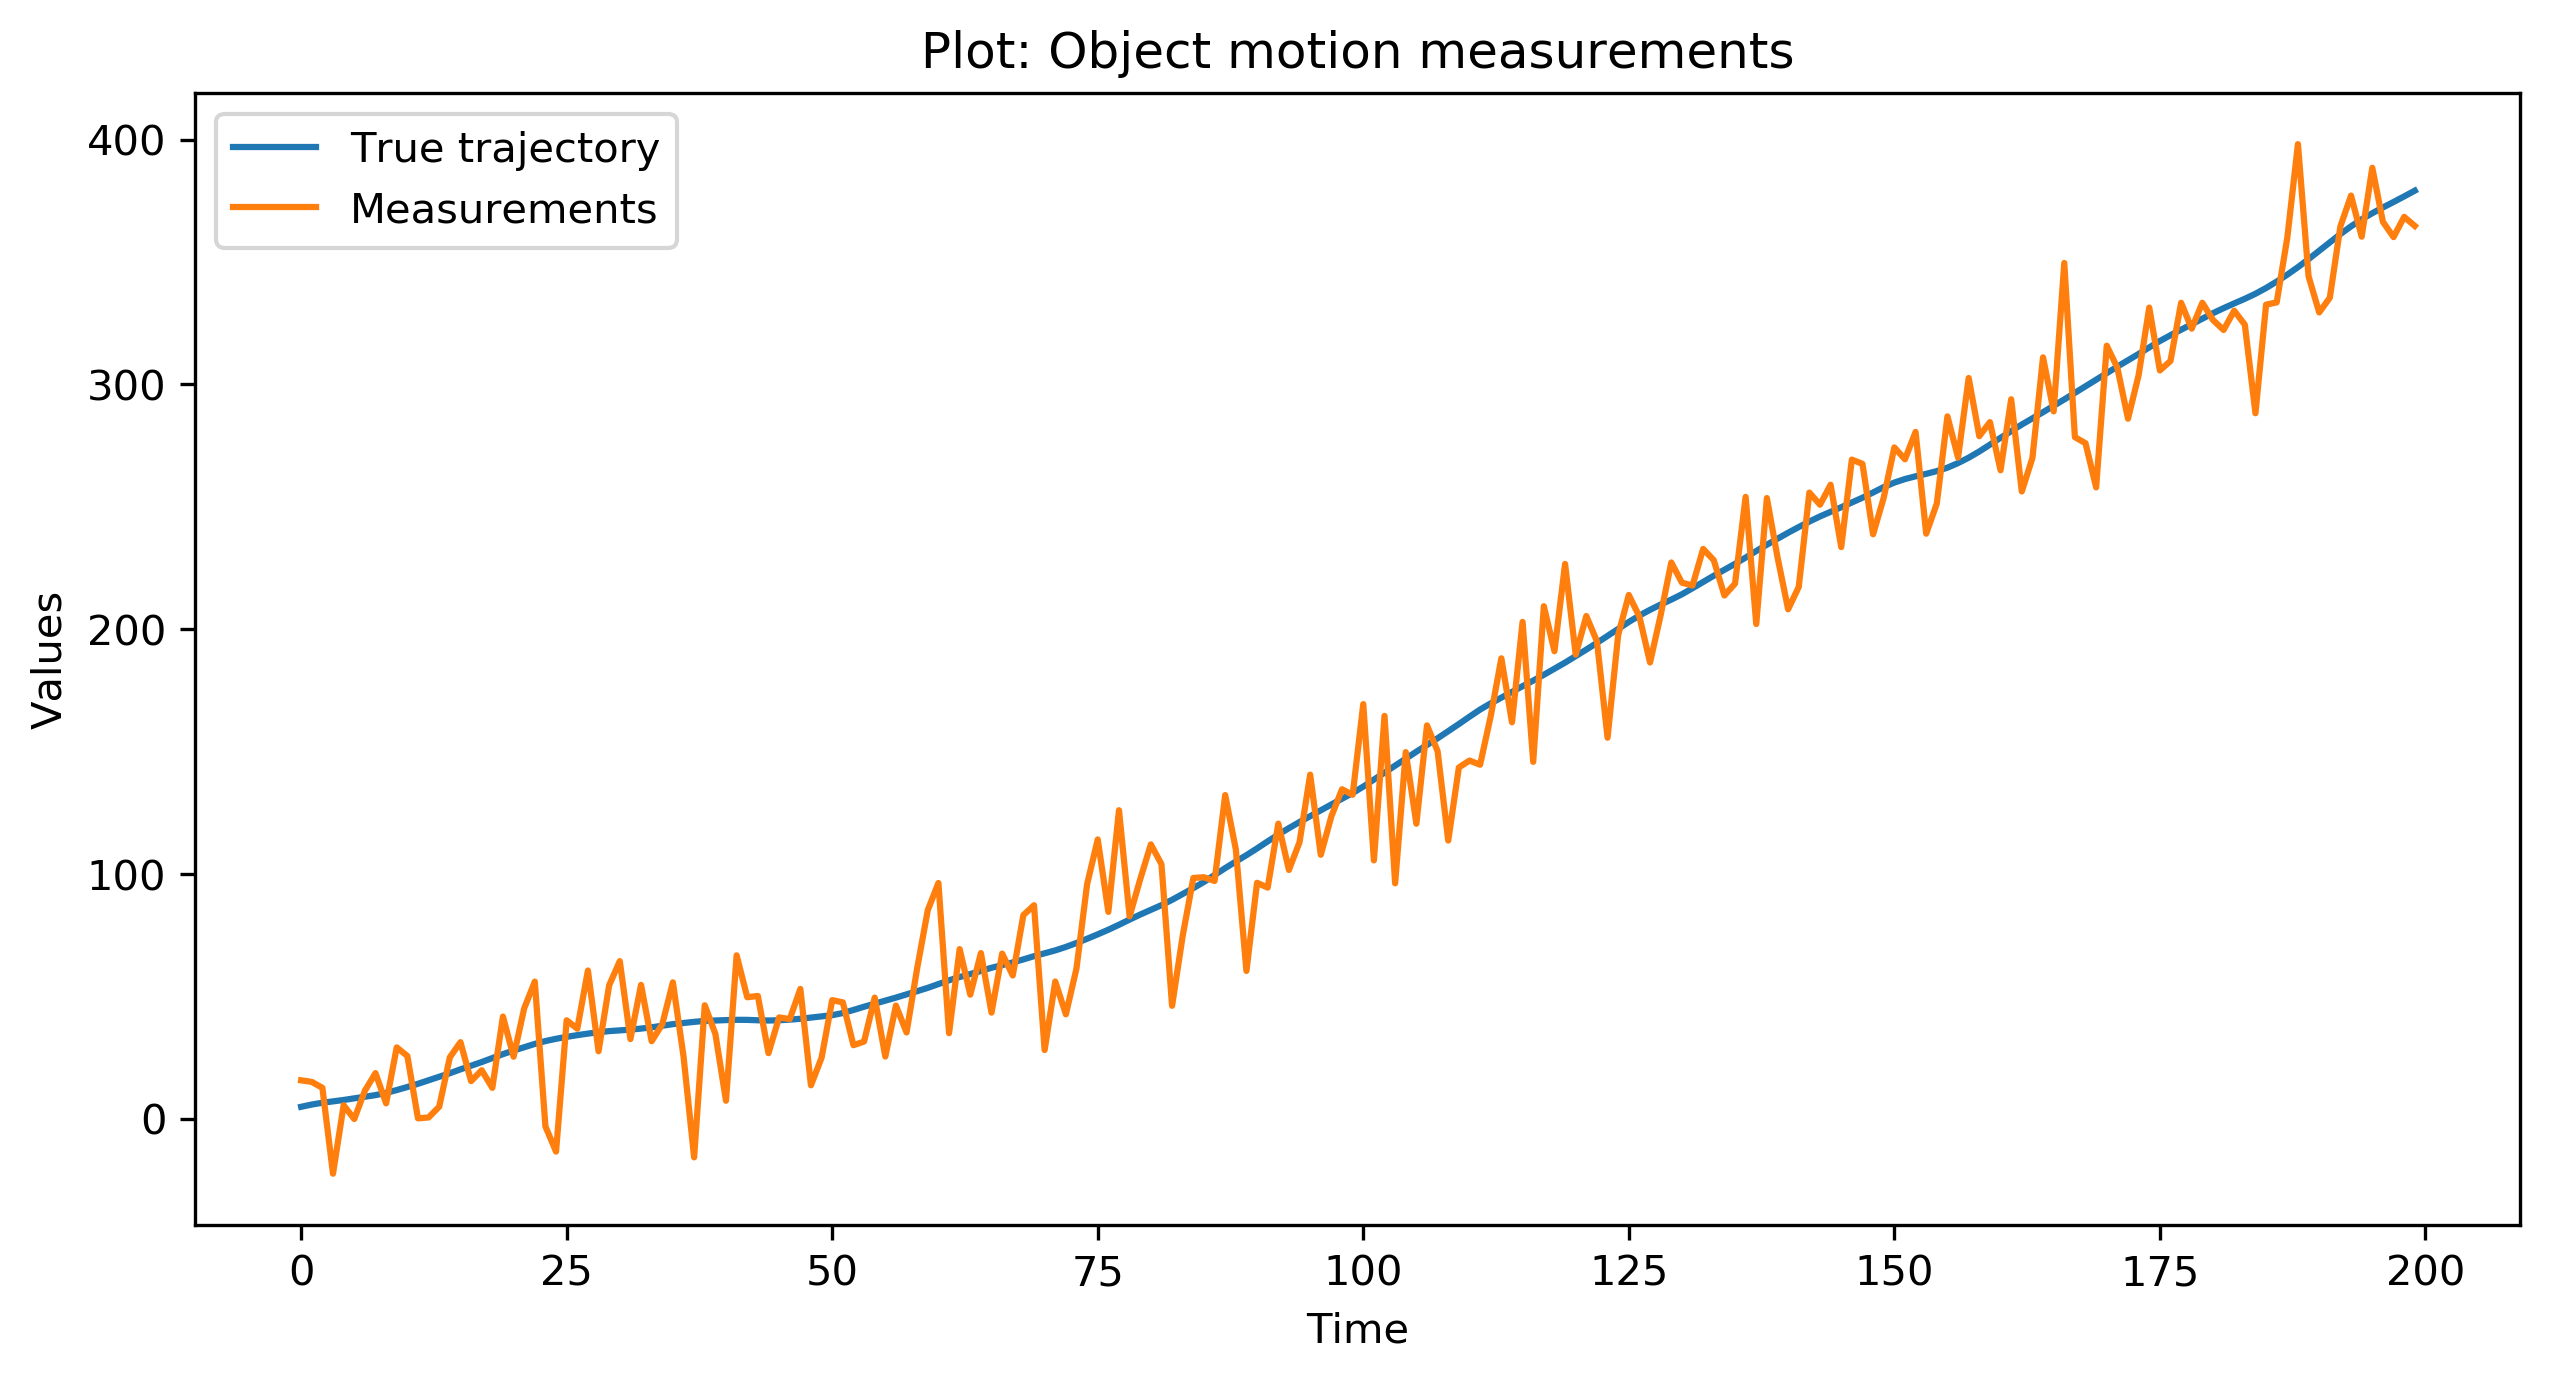

In [5]:
#2 Generating measurements
#Variance
sn = 20
s2n = sn**2
z = np.zeros(c)
n = np.random.normal(0,sn,c)

#determine measurment
for i in range (c):
    z[i] = x[i] + n[i]
    
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Object motion measurements')    
plt.plot(x, label='True trajectory')
plt.plot(z, label='Measurements')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show() 

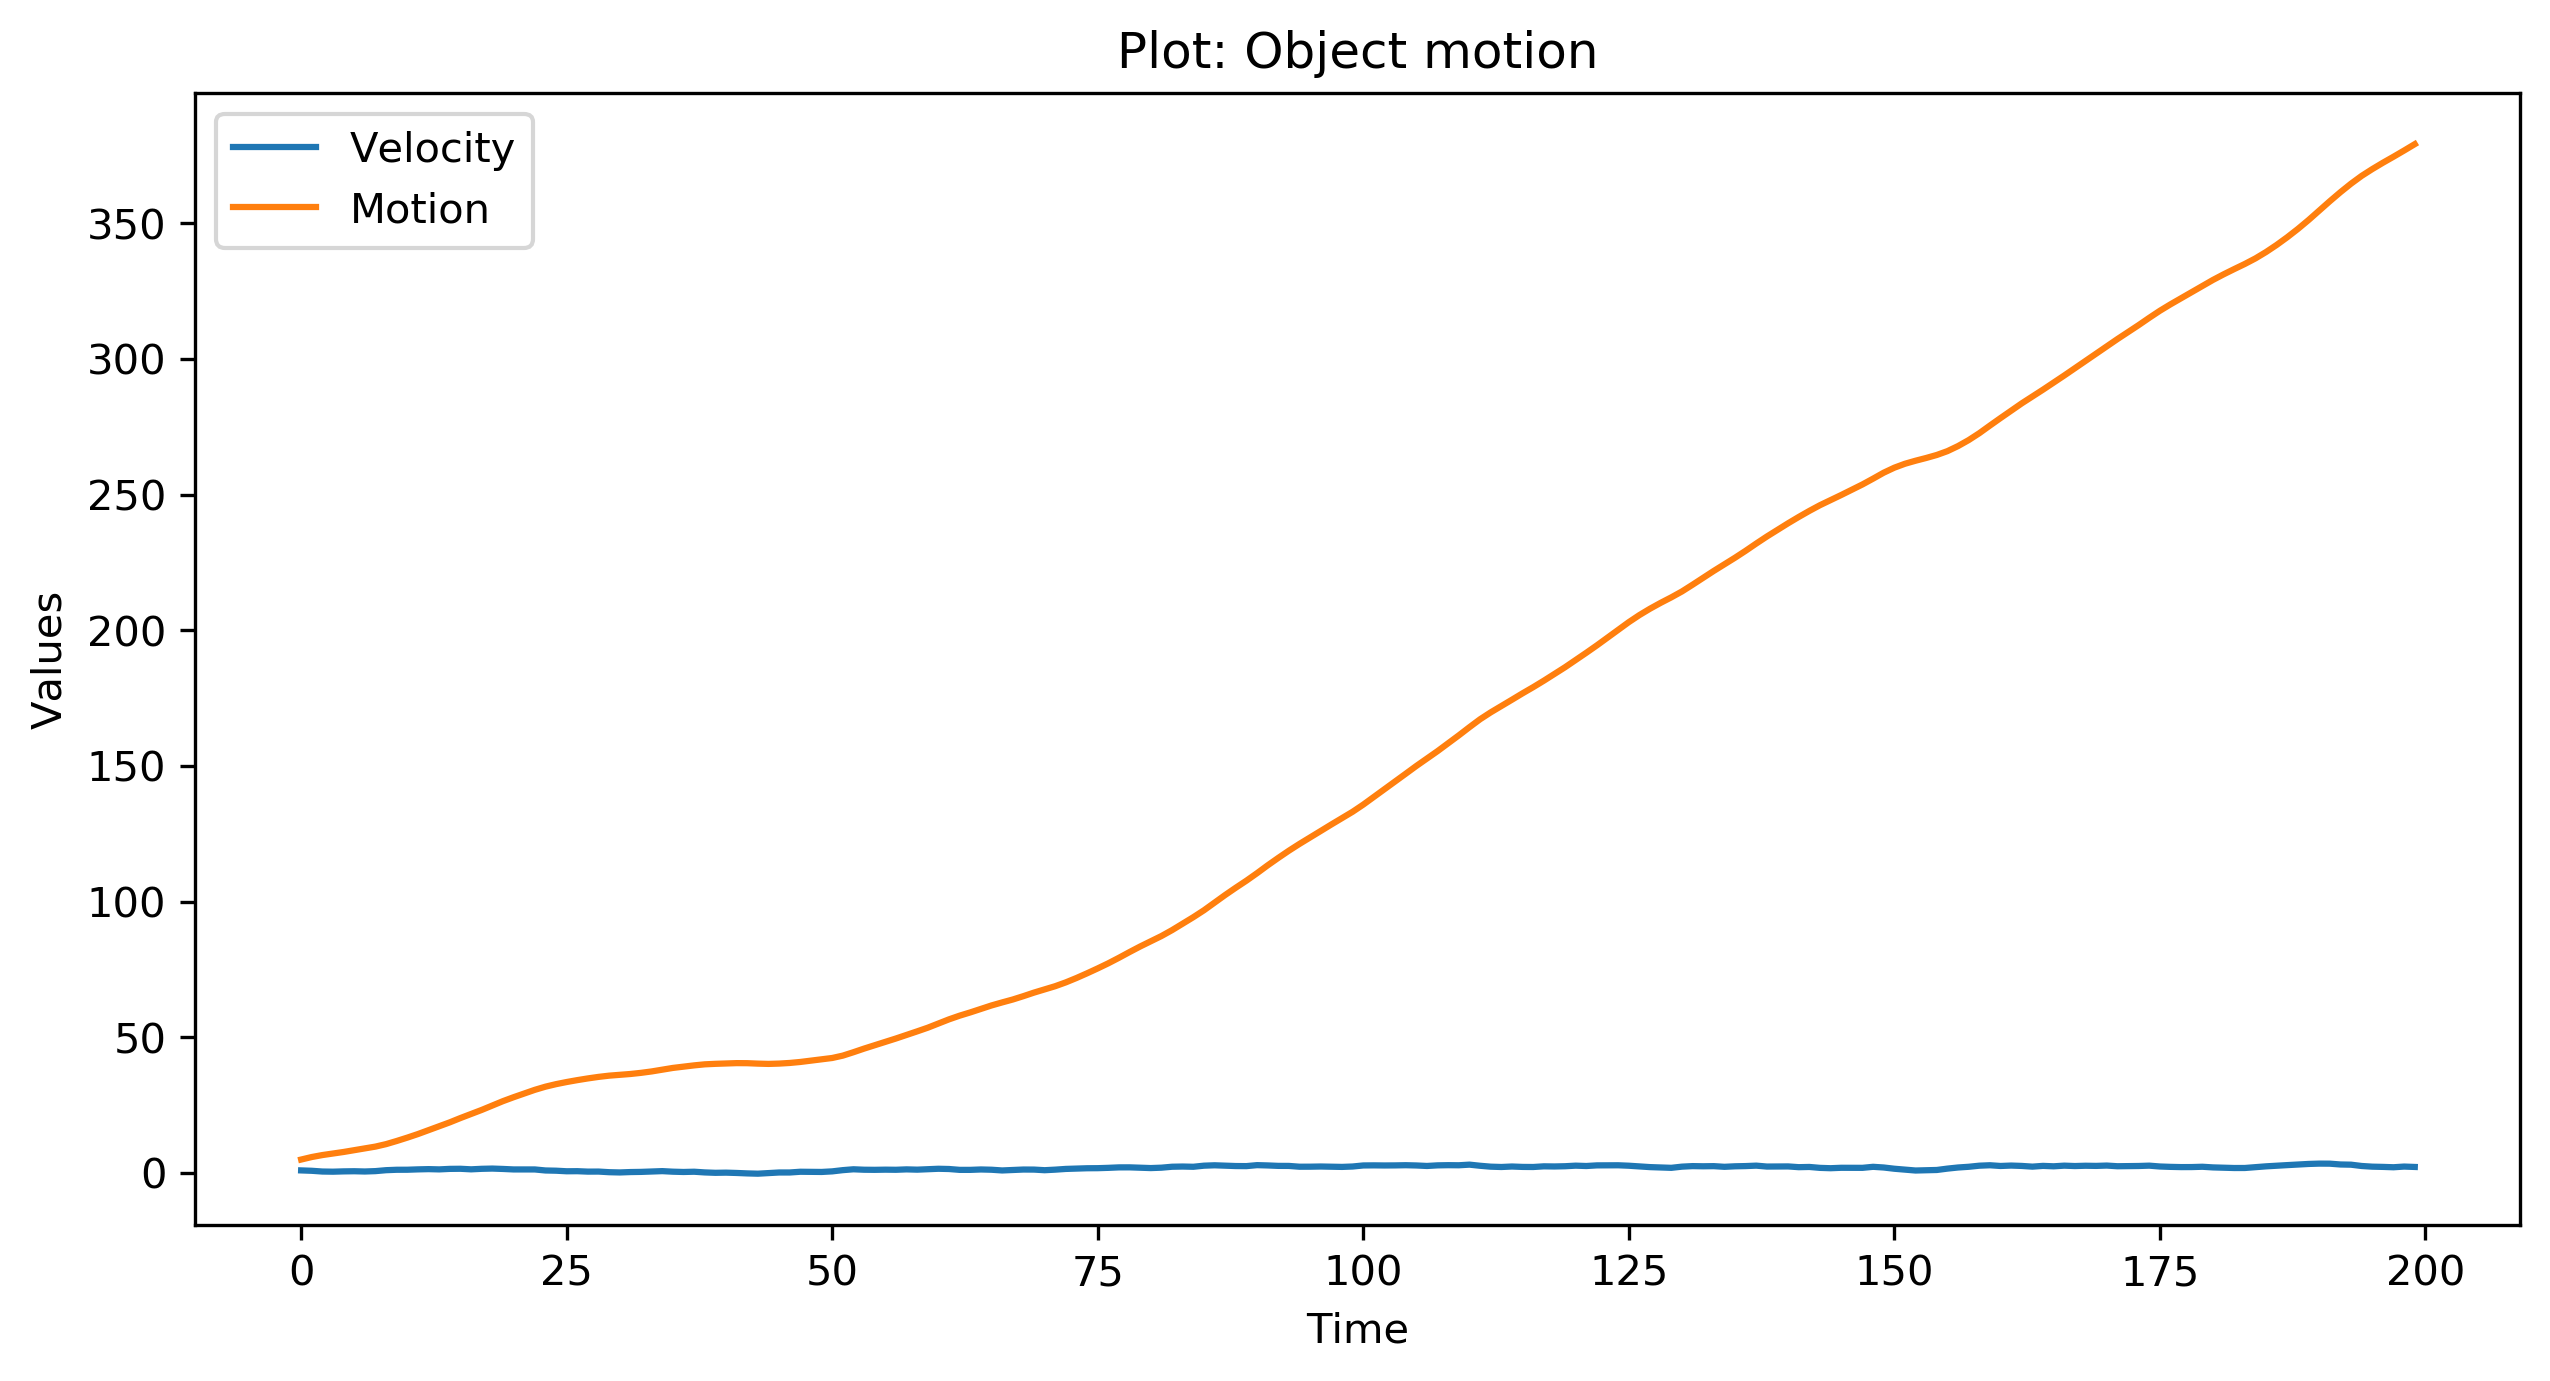

In [6]:
#3 Presenting state equation
X1 = np.matrix((5,1))
F = np.matrix(((1,t),(0,1)))
G = np.matrix((t**2/2,t)).T
H = np.matrix((1,0))

X = np.zeros([c,2])
X[0] = X1
for i in range (1,c):
    frst = np.matmul(F,np.asmatrix(X[i-1]).T)
    scnd = G.dot(a[i-1])
    X[i] = np.add(frst,scnd).T

figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Object motion')    
plt.plot(X.T[1], label='Velocity')
plt.plot(X.T[0], label='Motion')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

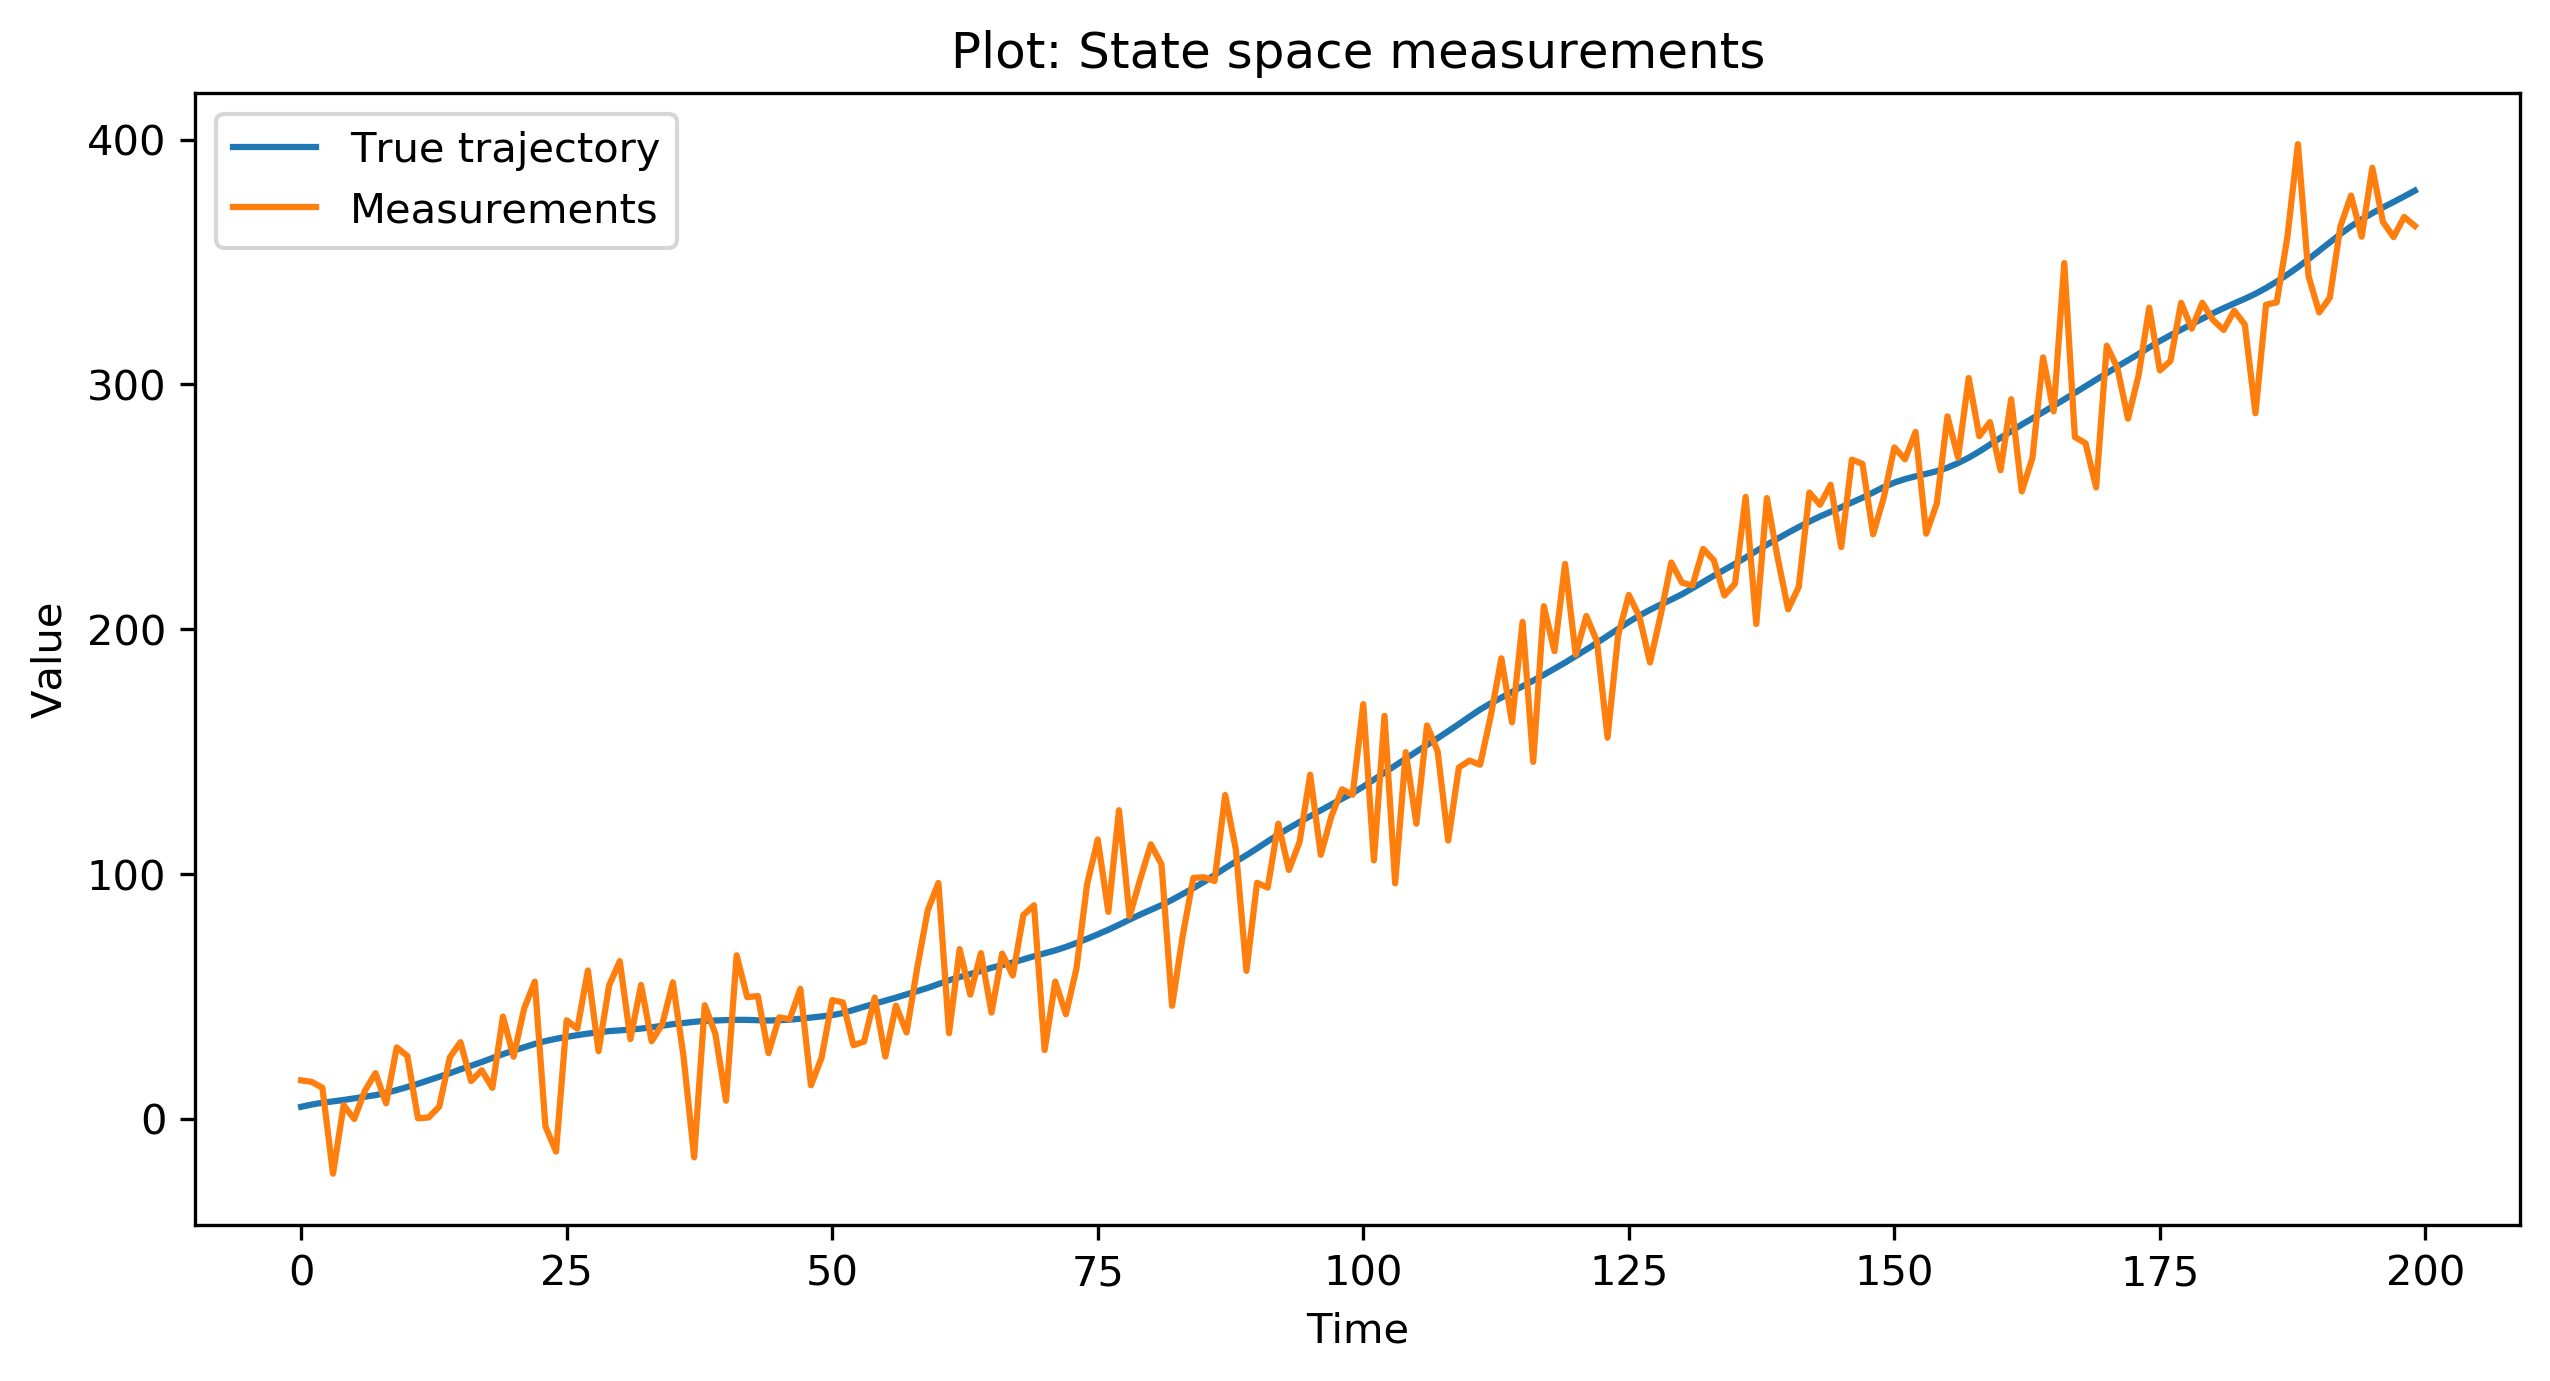

In [7]:
Z = np.zeros(c)
for i in range (c):
    Z[i] = H.dot(X[i])+n[i]
    
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: State space measurements')    
plt.plot(X.T[0], label='True trajectory')
plt.plot(Z, label='Measurements')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show() 

In [8]:
#4 Developing Kalman Filter
X0 = np.matrix((2,0))
P00 = np.matrix(((10000,0),(0,10000)))

#Covariance matrix Q
Q = np.matmul(G,G.T)*s2a
R = s2n
I = np.matrix(((1,0),(0,1)))

#Kalman filtering
P = P00
X_f = np.zeros([c,2])
X_f7 = np.zeros([c-7,2])
K_f = np.zeros([c,2])
P_g = np.zeros(c)
X_f[0] = X0
F7 = F
for i in range (6):
    F7 = F7.dot(F)
for i in range (1,c):
    X_p = F.dot(np.asmatrix(X_f[i-1]).T)
    Pz = np.add(F.dot(P).dot(F.T),Q)
    frst = np.add(H.dot(Pz).dot(H.T),R)
    K = Pz.dot(H.T).dot(np.linalg.inv(frst))
    pre_scnd = np.subtract(Z[i],H.dot(X_p))
    scnd = K.dot(pre_scnd)
    P = np.matmul(np.subtract(I,np.matmul(K,H)),Pz)
    X_f[i] = np.add(X_p,scnd).T
    if i < c-7:
        X_f7[i] = np.matmul(F7,X_f[i])
    K_f[i] = K.T
    P_g[i] = np.sqrt(P[0,0])
#deleting first row
K_f = np.delete(K_f, 0, 0)
P_g = np.delete(P_g, 0, 0)

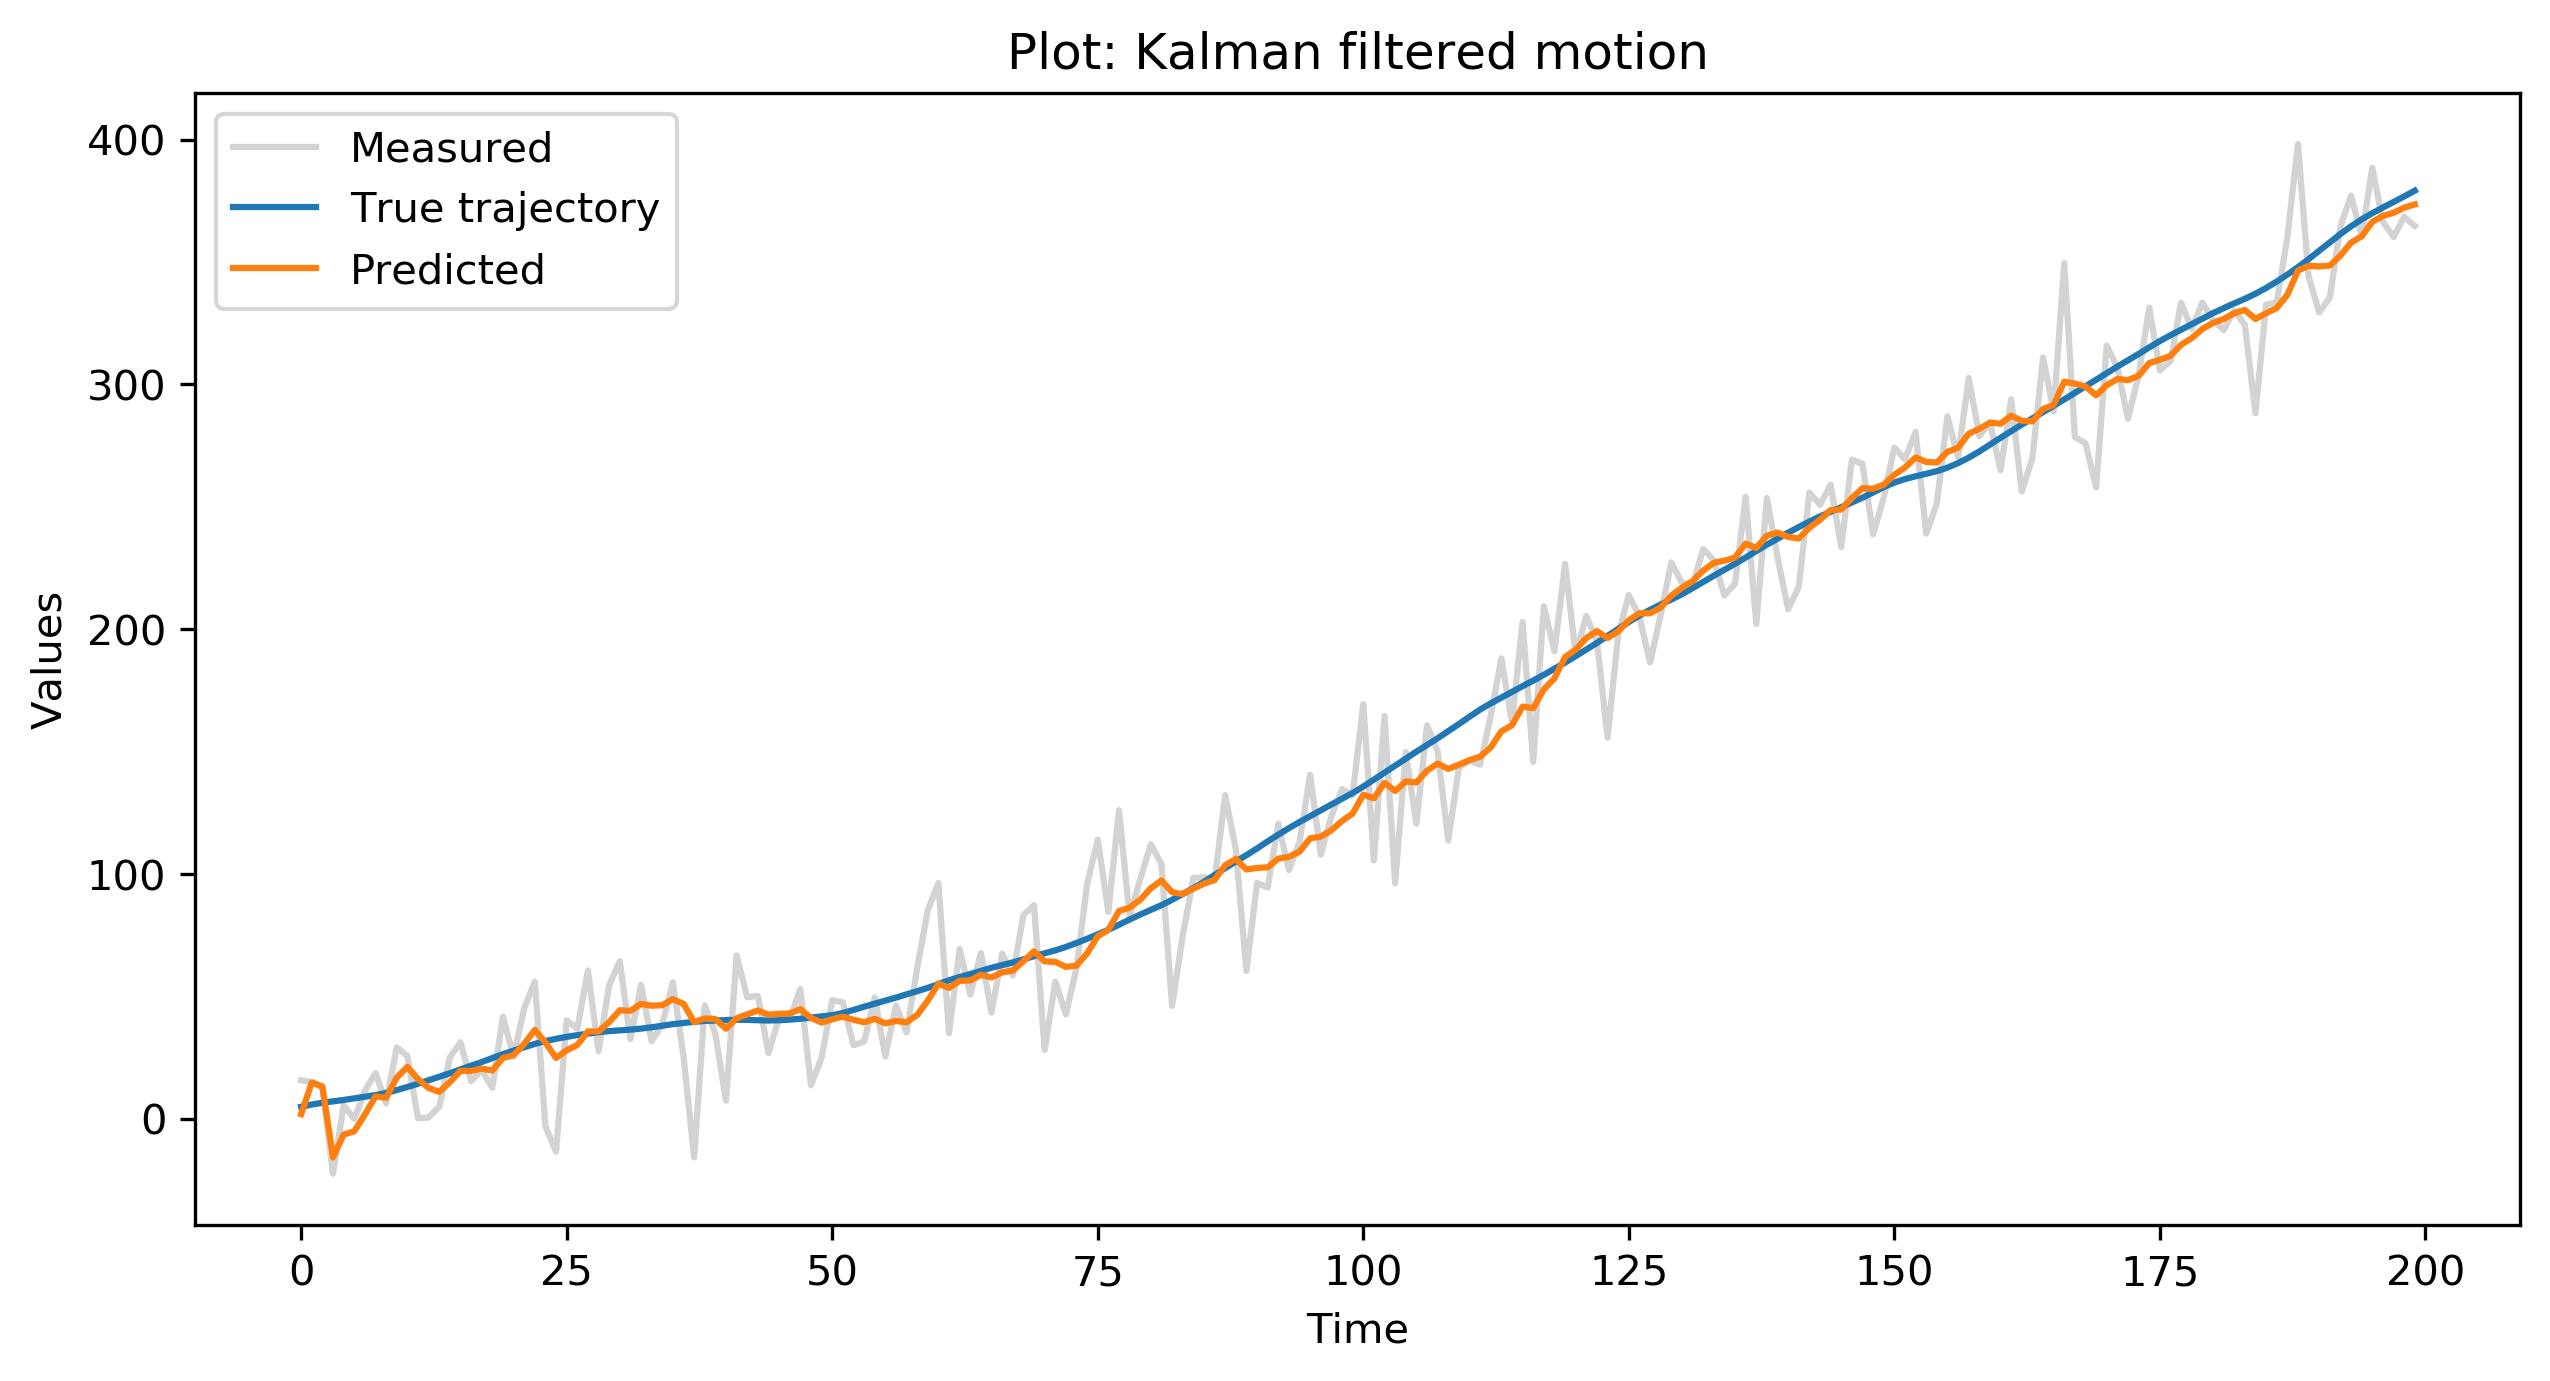

In [9]:
#5 Plotting the result
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Kalman filtered motion')
plt.plot(Z, label='Measured', c='lightgrey')
plt.plot(X.T[0], label='True trajectory')
plt.plot(X_f.T[0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

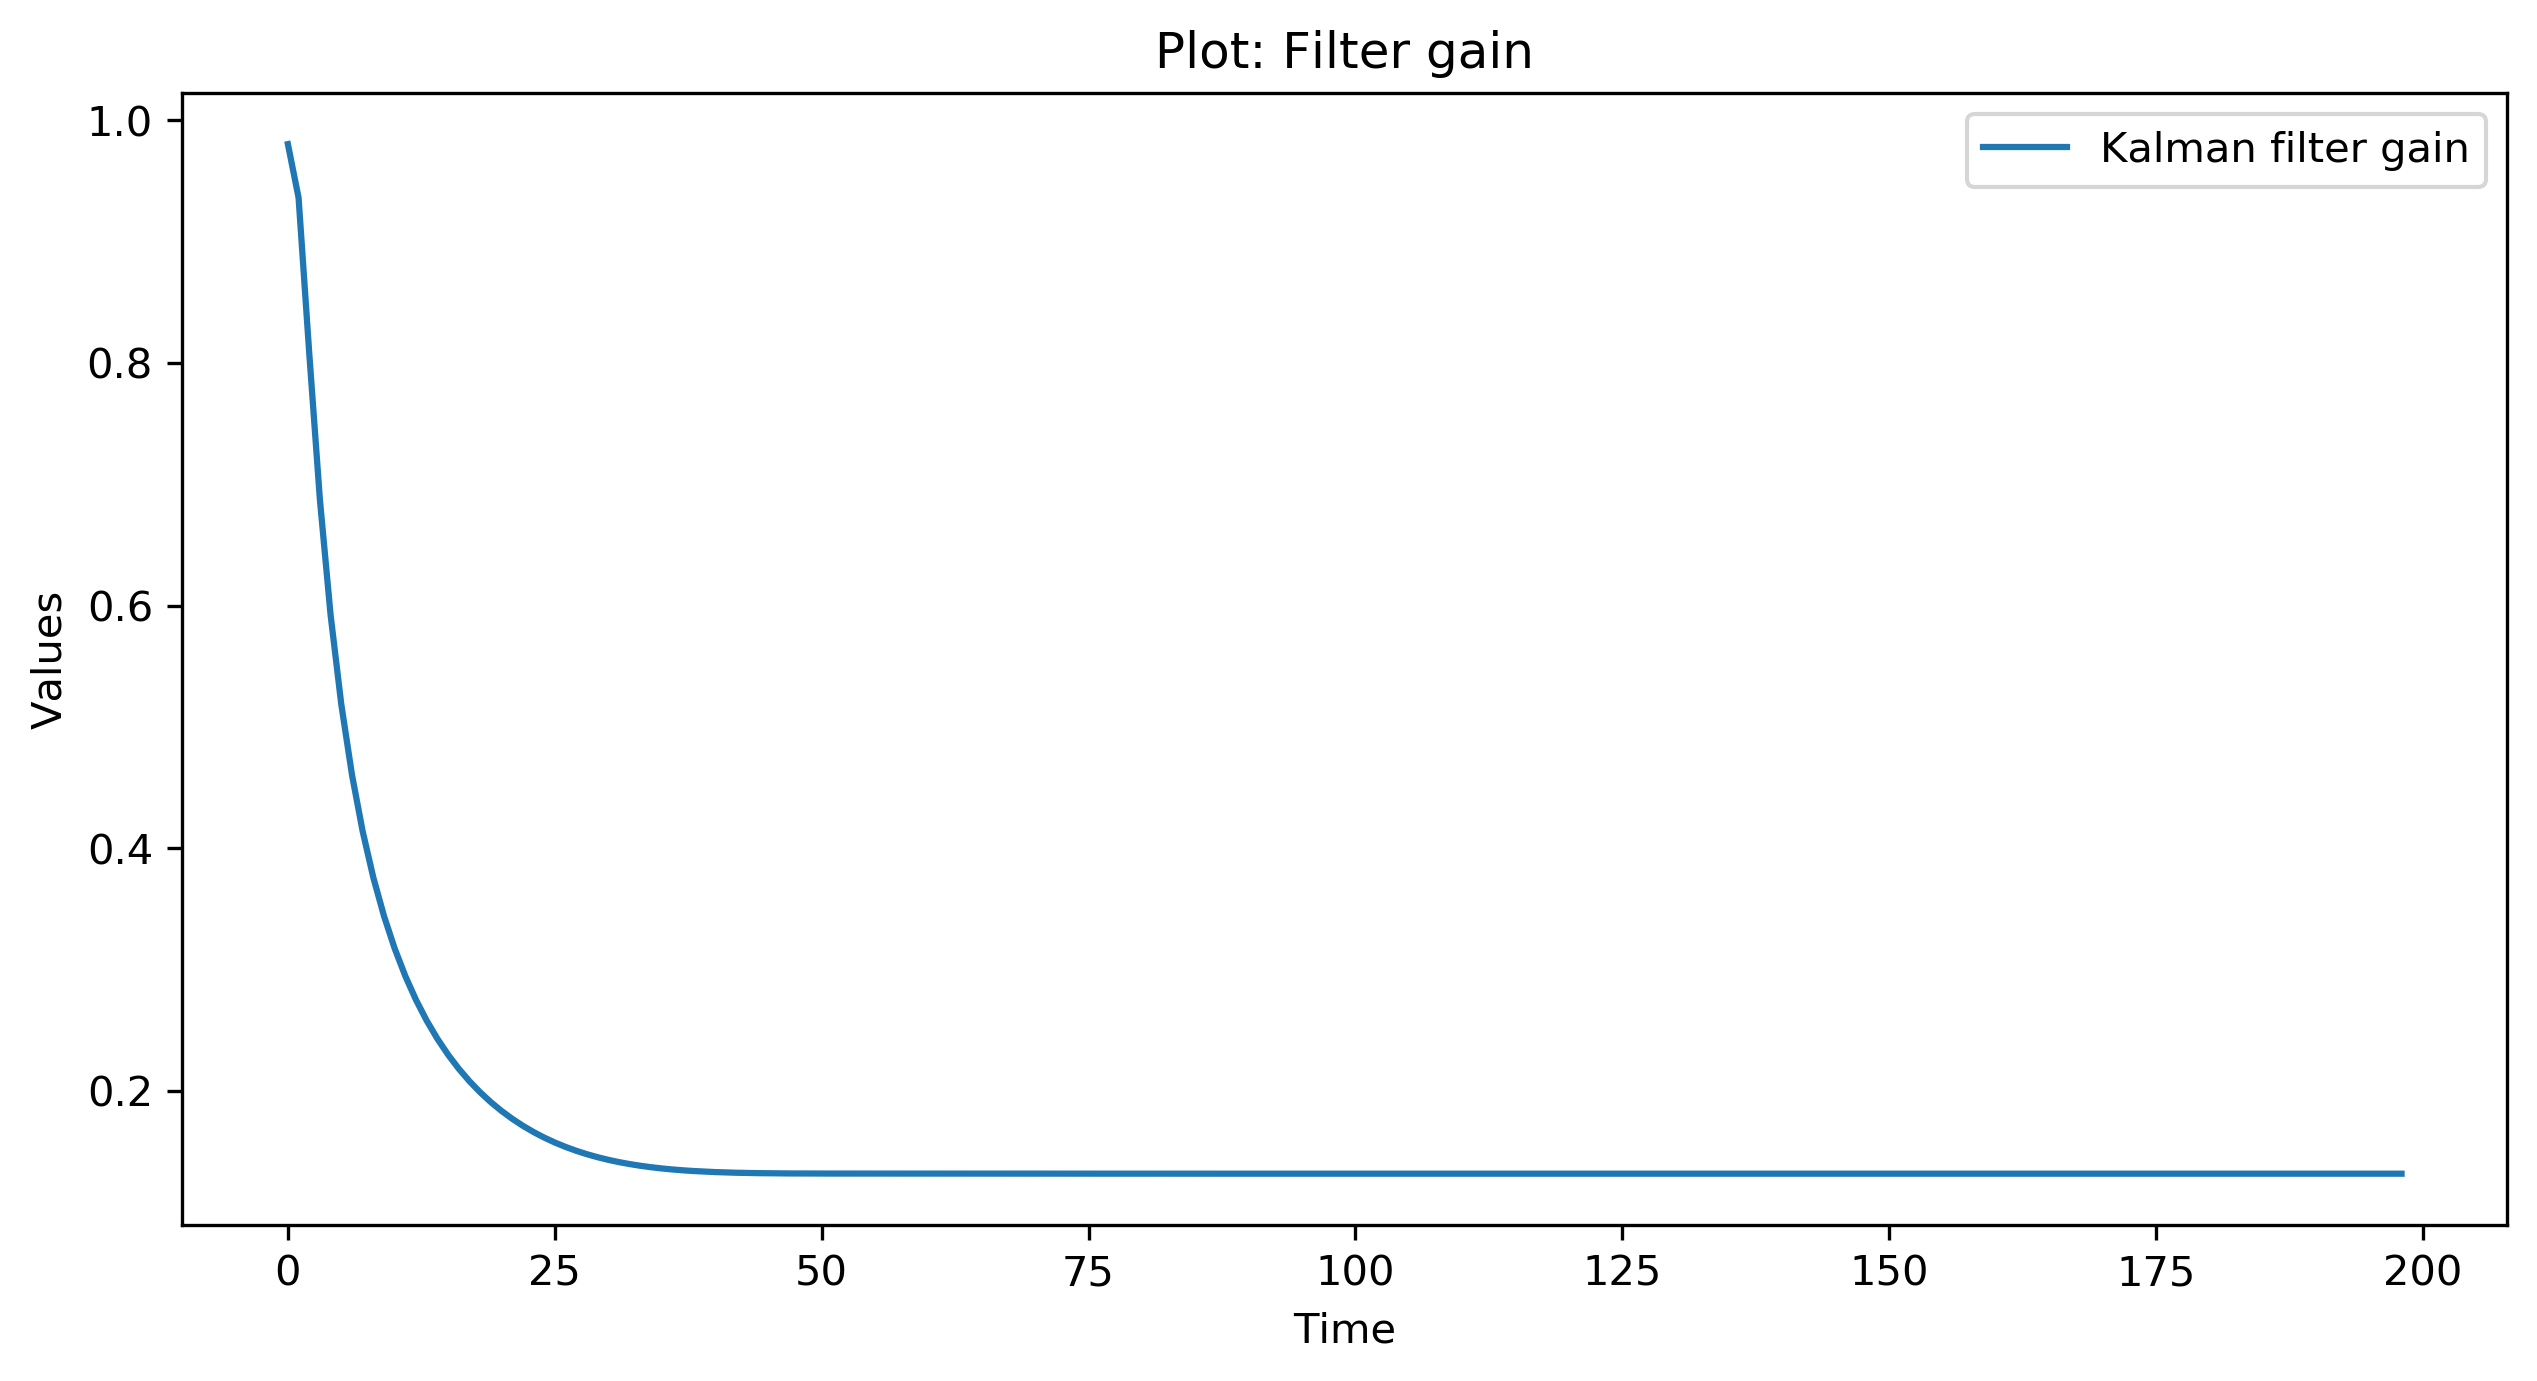

In [10]:
#6 Plot filter gain K
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Filter gain')    
plt.plot(K_f.T[0], label='Kalman filter gain')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

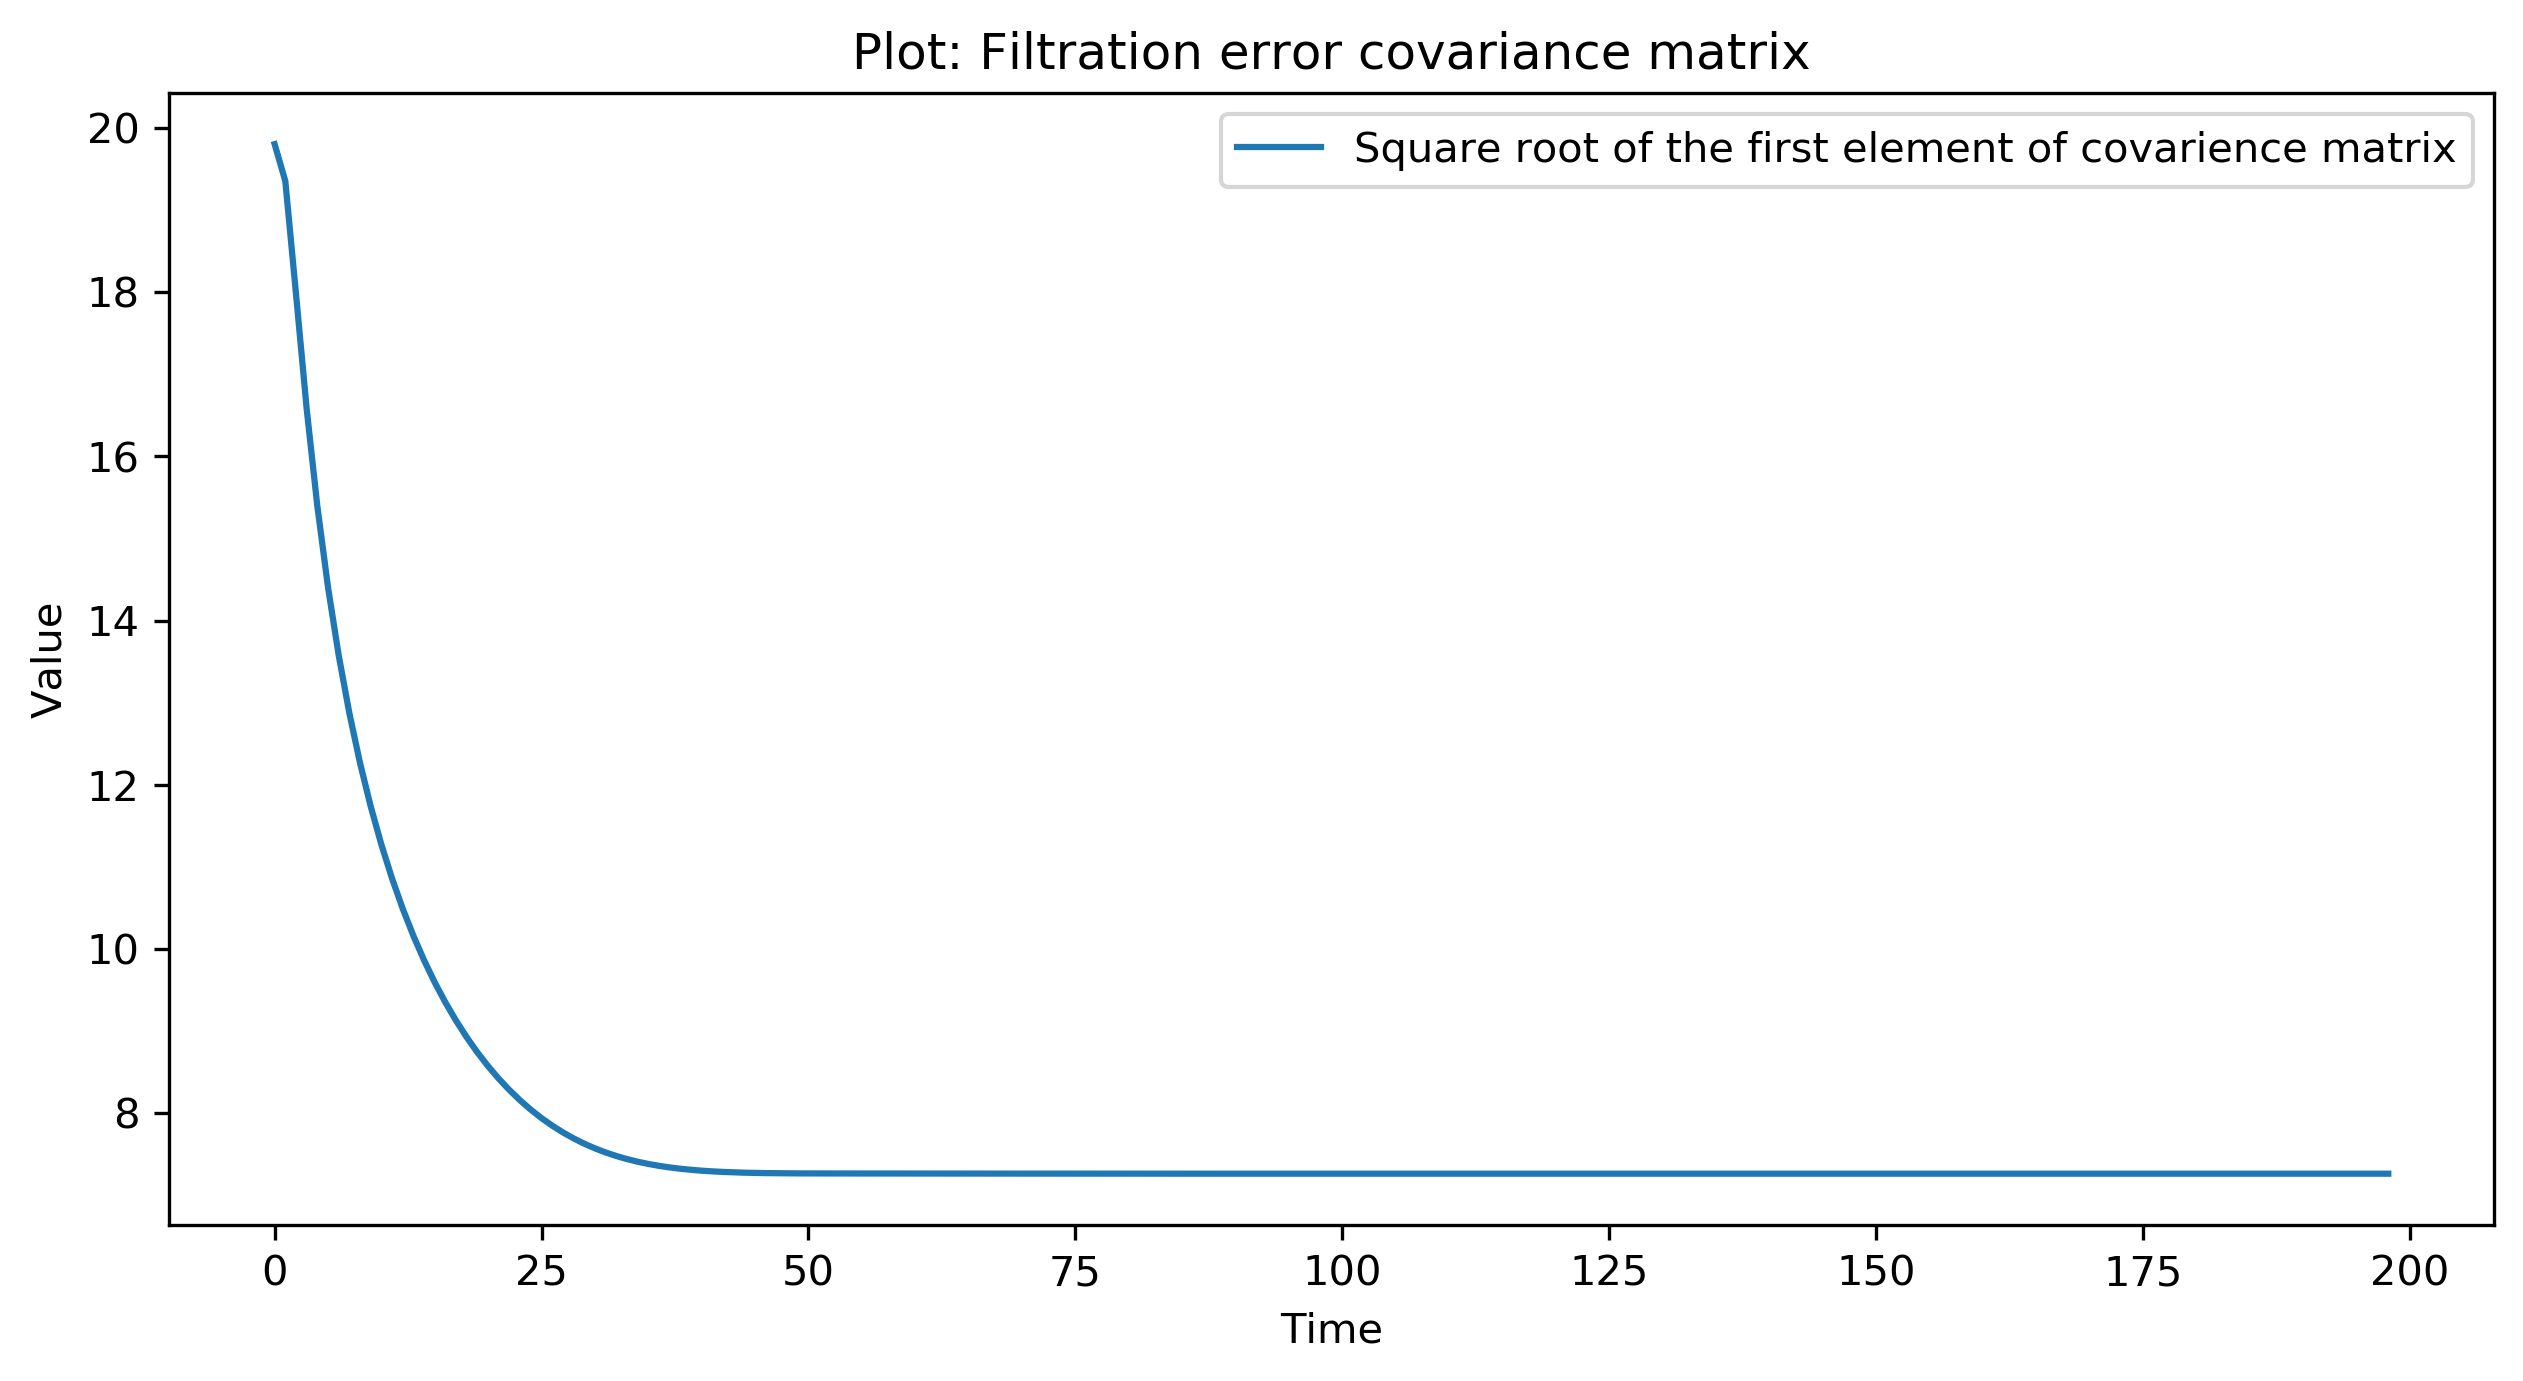

In [11]:
#P
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Filtration error covariance matrix')    
plt.plot(P_g, label='Square root of the first element of covarience matrix')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

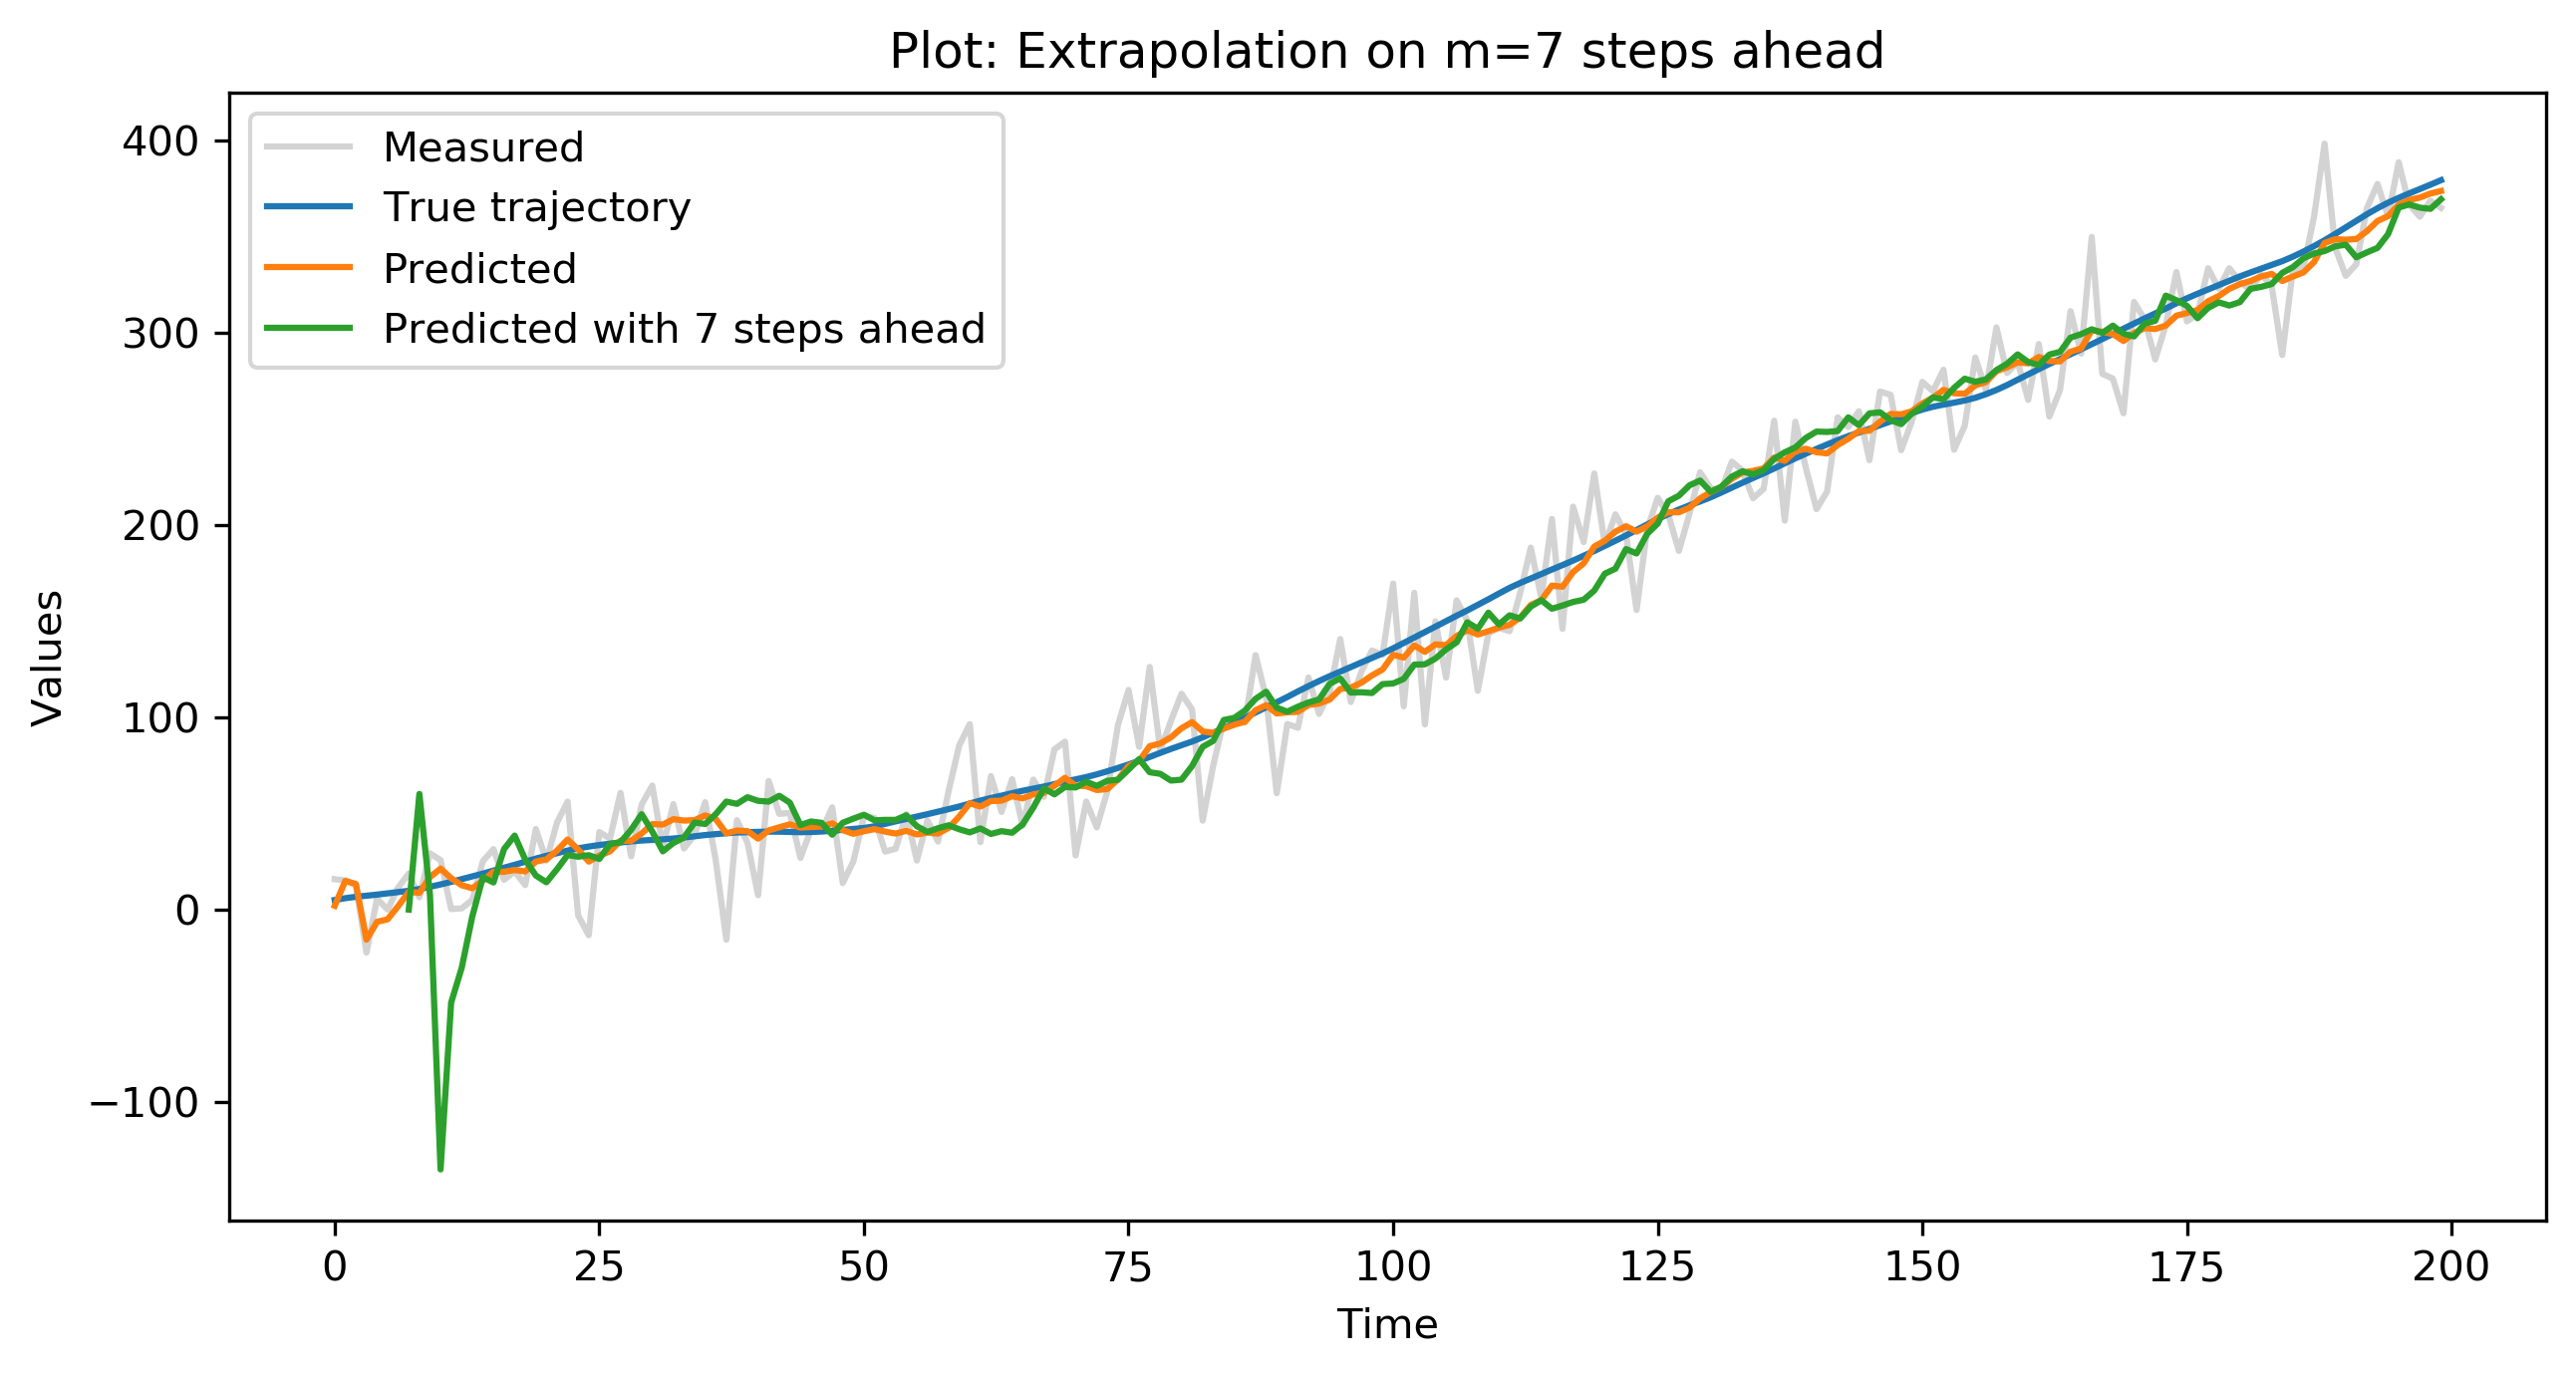

In [12]:
#7 Extrapolation on m=7 steps ahead
axisfor7 = np.zeros(c-7)
for i in range (c-7):
    axisfor7[i] = 7+i

figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Extrapolation on m=7 steps ahead')
plt.plot(Z, label='Measured', c='lightgrey')
plt.plot(X.T[0], label='True trajectory')
plt.plot(X_f.T[0], label='Predicted')
plt.plot(axisfor7, X_f7.T[0], label='Predicted with 7 steps ahead')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

In [13]:
#8 500 runs
def run(n,seven=False, P_init=np.matrix(((10000,0),(0,10000))) ):
    def gen():
        a = np.random.normal(0,sa,c)
        n = np.random.normal(0,sn,c)
        X1 = np.matrix((5,1))
        F = np.matrix(((1,t),(0,1)))
        G = np.matrix((t**2/2,t)).T
        H = np.matrix((1,0))

        X = np.zeros([c,2])
        X[0] = X1
        for i in range (1,c):
            frst = np.matmul(F,np.asmatrix(X[i-1]).T)
            scnd = G.dot(a[i-1])
            X[i] = np.add(frst,scnd).T
        Z = np.zeros(c)
        for i in range (c):
            Z[i] = H.dot(X[i])+n[i]
        return X.T,Z
        
    def kalman(z_g):
        P = P_init
        X_f = np.zeros([c,2])
        X_f7 = np.zeros([c-7,2])
        X_f[0] = X0
        F7 = F
        for i in range (6):
            F7 = F7.dot(F)
        for i in range (1,c):
            X_p = F.dot(np.asmatrix(X_f[i-1]).T)
            Pz = np.add(F.dot(P).dot(F.T),Q)
            frst = np.add(H.dot(Pz).dot(H.T),R)
            K = Pz.dot(H.T).dot(np.linalg.inv(frst))
            pre_scnd = np.subtract(z_g[i],H.dot(X_p))
            scnd = K.dot(pre_scnd)
            P = np.matmul(np.subtract(I,np.matmul(K,H)),Pz)
            X_f[i] = np.add(X_p,scnd).T
            if i < c-7 and seven:
                X_f7[i] = np.matmul(F7,X_f[i])
        if(seven):
             return X_f7.T
        else:
            return X_f.T
    
    if seven:
        co = c-7
    else:
        co = c
    error = np.zeros(co)
    for i in range (n):
        cur_x,cur_z = gen()
        res = kalman(cur_z)
        if seven:
            for i in range (7):
                cur_x = np.delete(cur_x, i, 1)
        s = np.power(np.subtract(cur_x[0],res[0]),2)    
        error = np.add(s,error)
    final = np.zeros(co)
    for k in range (2,co):
        final[k] = np.sqrt(error[k]/(n-1))
    return final

In [14]:
err_k = run(500)
err_k7 = run(500,True)

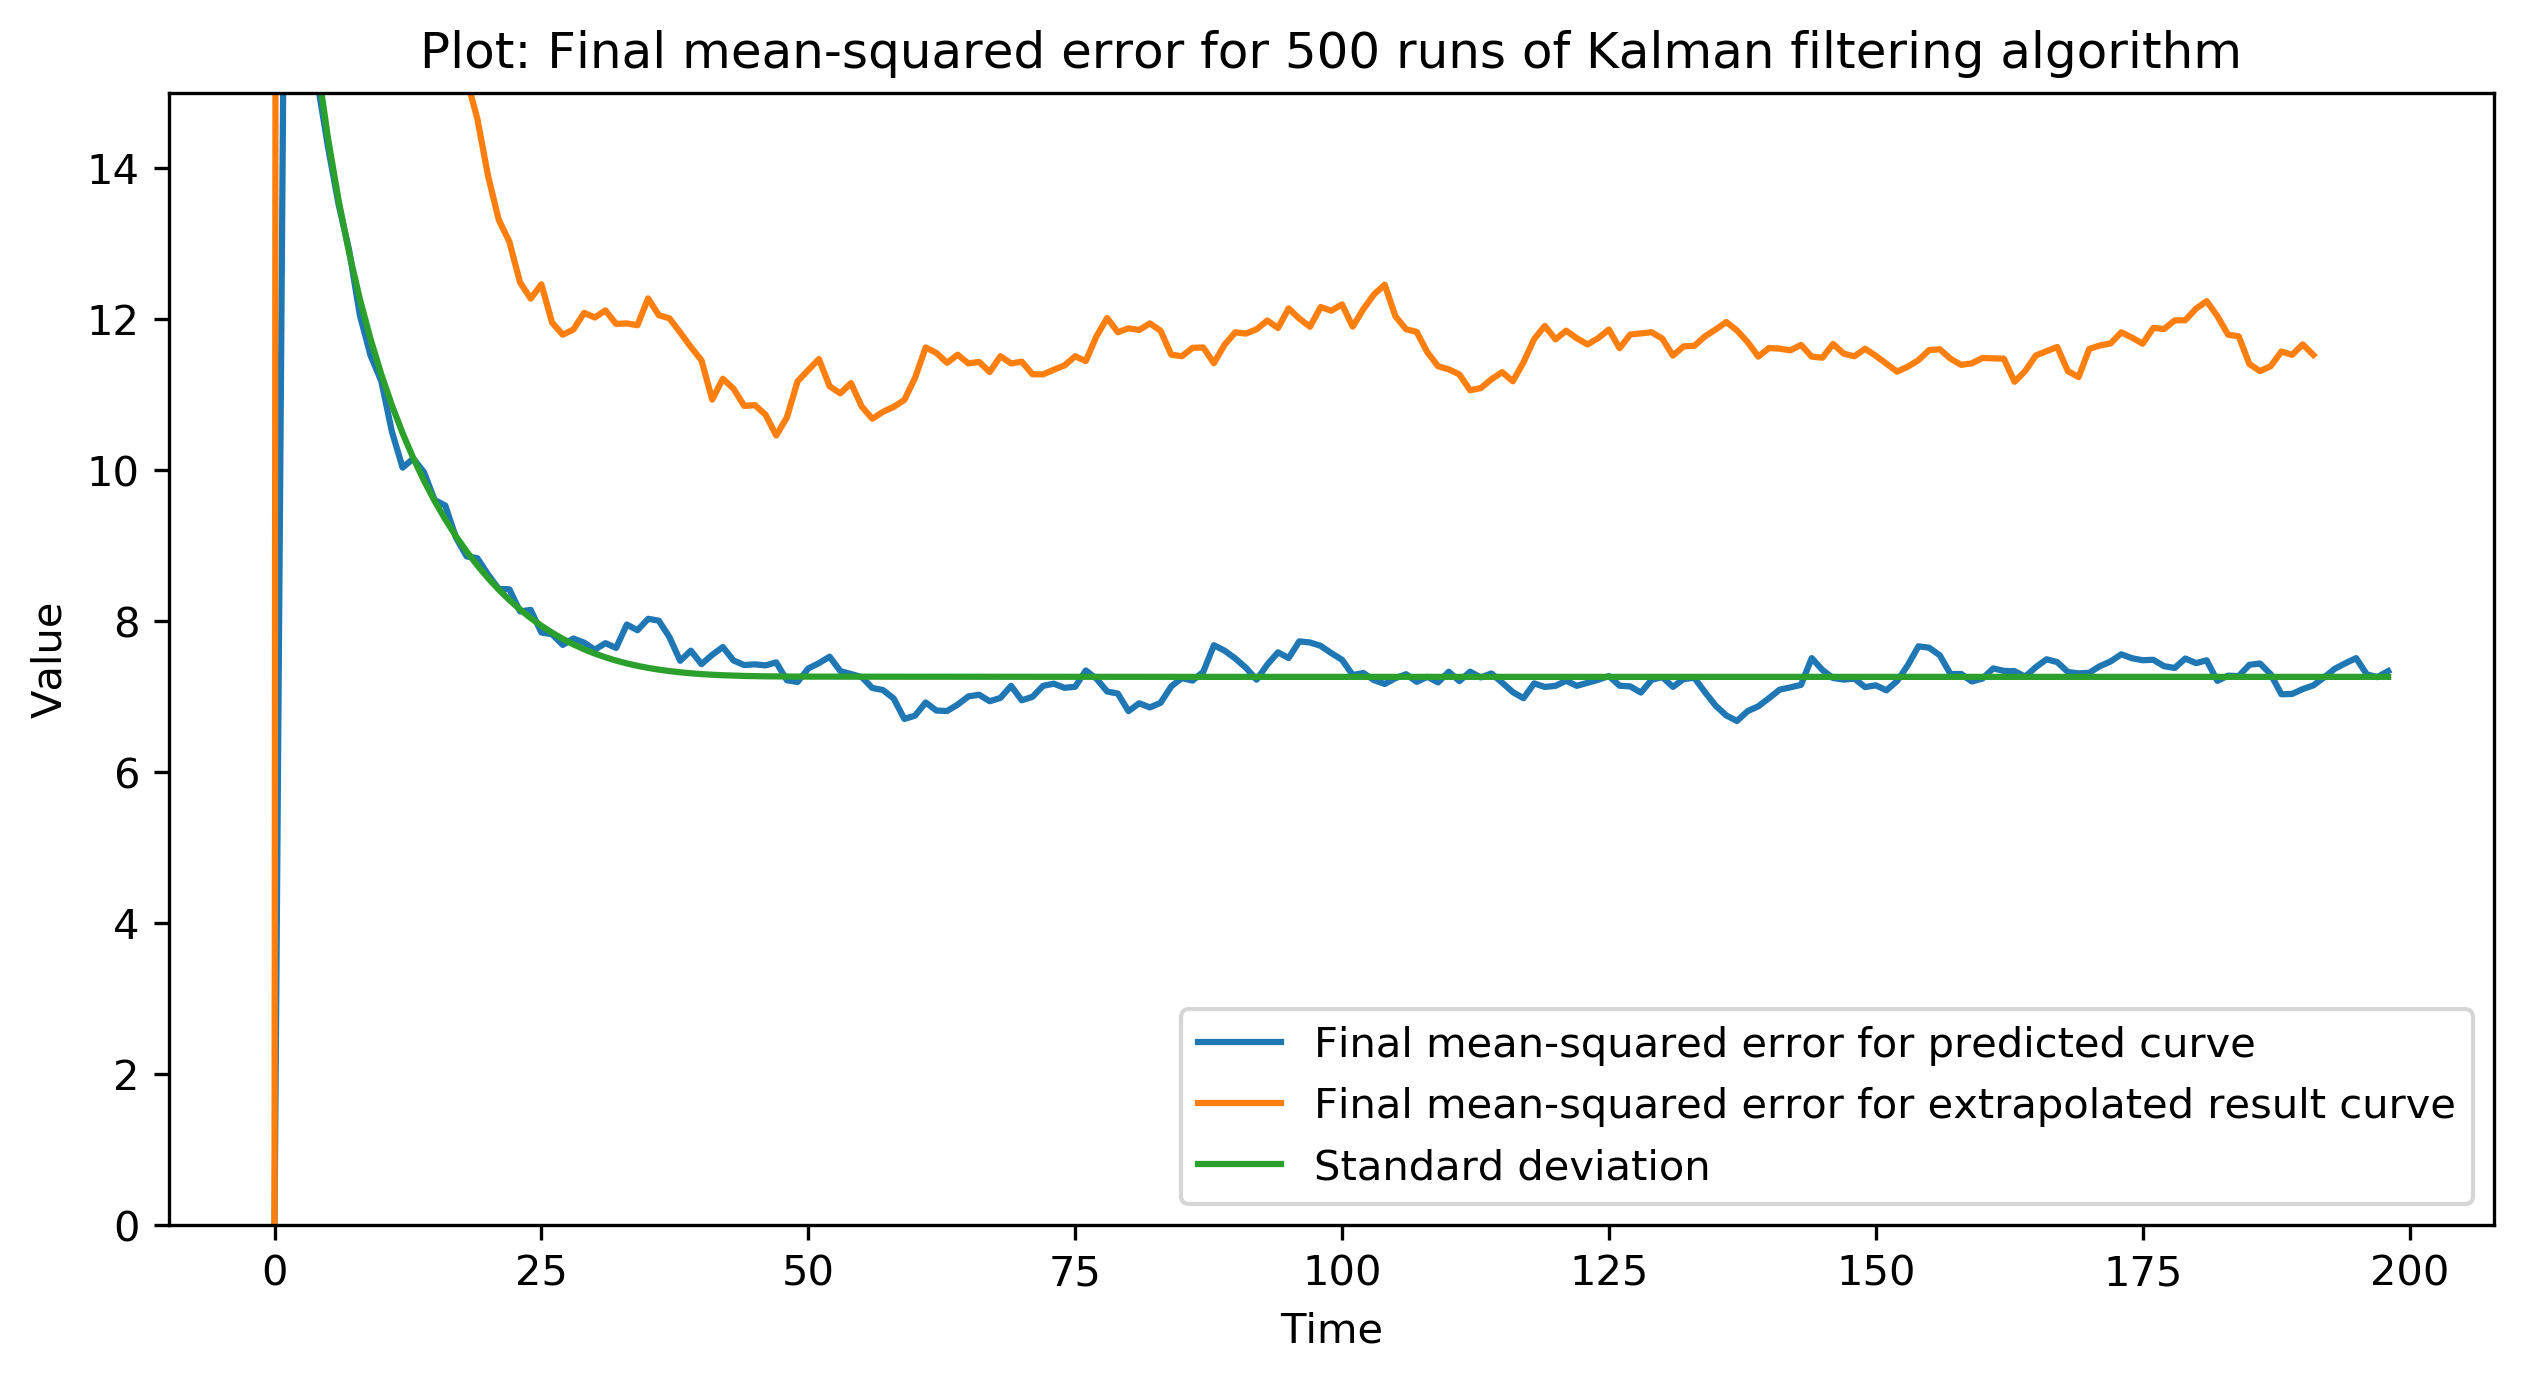

In [15]:
#deleting first row
err_k = np.delete(err_k, 0)
err_k7 = np.delete(err_k7, 0)
#9
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Final mean-squared error for 500 runs of Kalman filtering algorithm')
plt.plot(err_k, label='Final mean-squared error for predicted curve')
plt.plot(err_k7, label='Final mean-squared error for extrapolated result curve')
plt.plot(P_g, label='Standard deviation')
plt.xlabel('Time')
plt.ylabel('Value')
plt.ylim((0, 15))
plt.legend()
plt.show()

In [16]:
#10 MOOOOORE 500 runs
P002 = np.matrix(((100,0),(0,100)))
err_k2 = run(500,False,P002)

In [17]:
P = P002
X_f2 = np.zeros([c,2])
P_g2 = np.zeros(c)
X_f2[0] = X0
for i in range (1,c):
    X_p = F.dot(np.asmatrix(X_f2[i-1]).T)
    Pz = np.add(F.dot(P).dot(F.T),Q)
    frst = np.add(H.dot(Pz).dot(H.T),R)
    K = Pz.dot(H.T).dot(np.linalg.inv(frst))
    pre_scnd = np.subtract(Z[i],H.dot(X_p))
    scnd = K.dot(pre_scnd)
    P = np.matmul(np.subtract(I,np.matmul(K,H)),Pz)
    X_f2[i] = np.add(X_p,scnd).T
    P_g2[i] = np.sqrt(P[0,0])


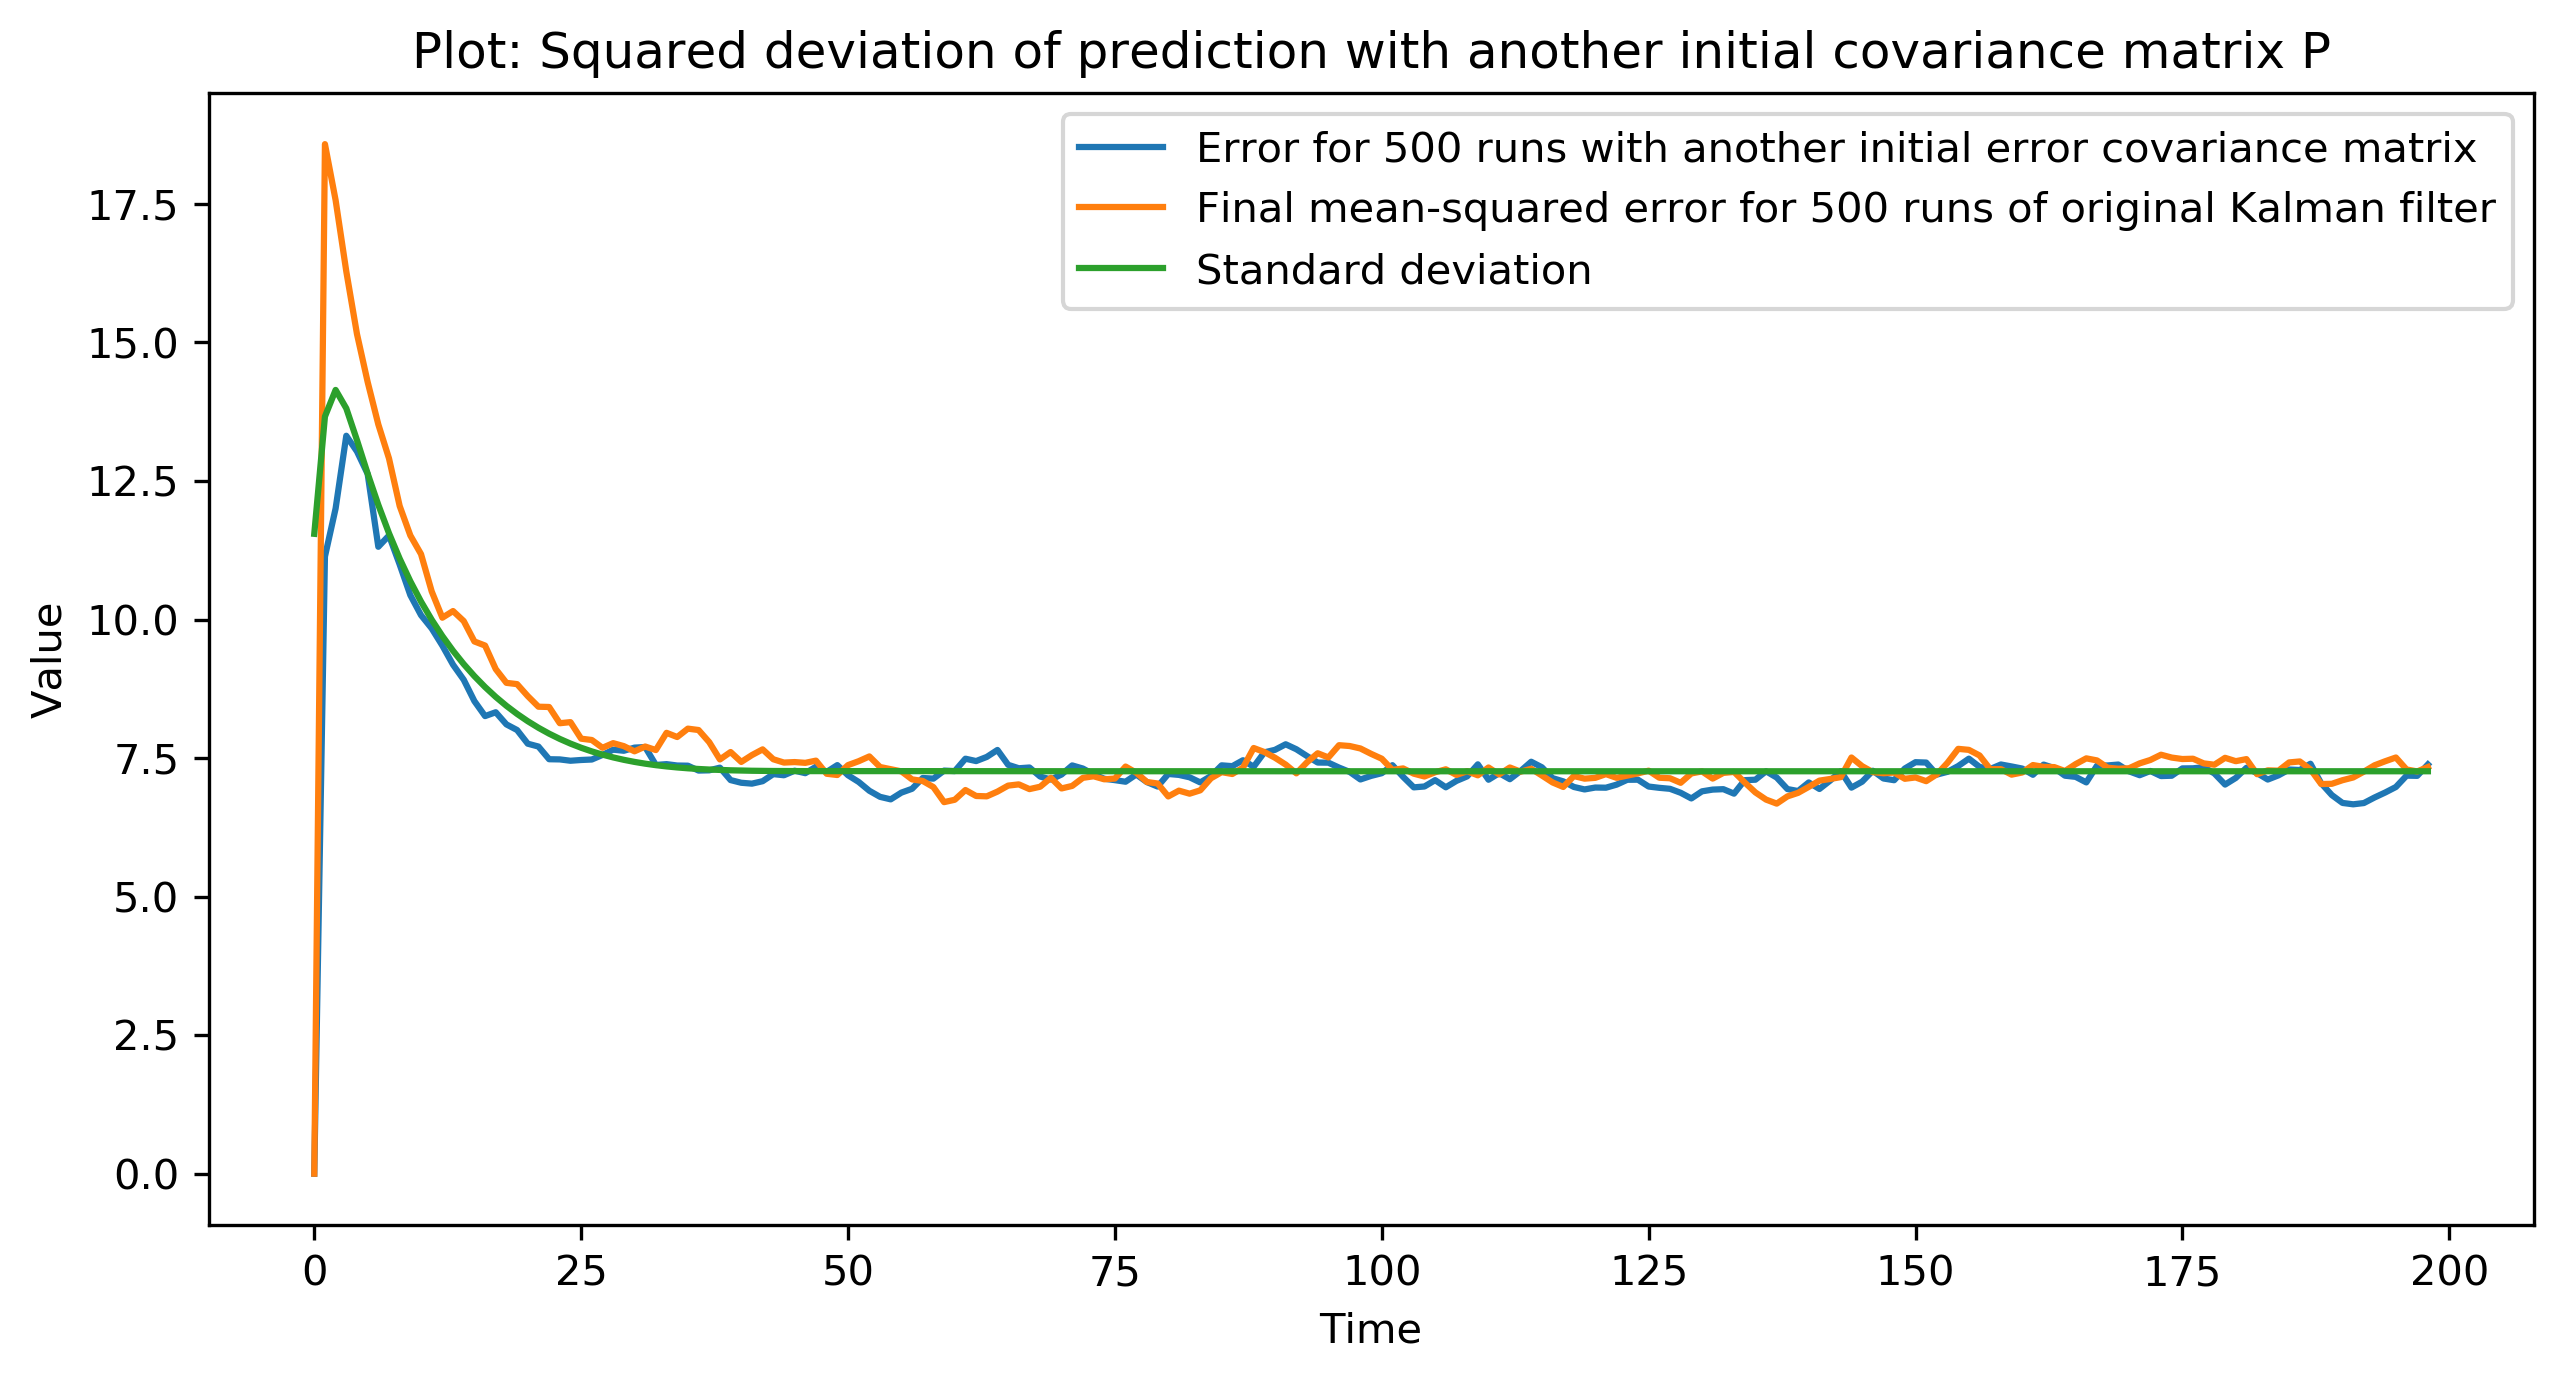

In [18]:
#deleting first row
err_k2 = np.delete(err_k2, 0)
P_g2 = np.delete(P_g2, 0, 0)

figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Squared deviation of prediction with another initial covariance matrix P')
plt.plot(err_k2, label='Error for 500 runs with another initial error covariance matrix')
plt.plot(err_k, label='Final mean-squared error for 500 runs of original Kalman filter')
plt.plot(P_g2, label='Standard deviation')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()